In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import pdb

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
m = ["A", "C", "G", "T"]
def id2seq(ids):
    return "".join([m[i] for i in ids])

In [3]:
# python function to get the base pair usage at each position in a list of sequences
def get_base_usage(seqs):
    # initialize a dictionary to store the base usage
    base_usage = {'A':[], 'C':[], 'G':[], 'T':[]}
    # loop through each position in the sequences
    for i in range(len(seqs[0])):
        # initialize a dictionary to store the base counts at this position
        base_counts = {'A':0, 'C':0, 'G':0, 'T':0}
        # loop through each sequence
        for seq in seqs:
            # add the base at this position to the base counts
            base_counts[seq[i]] += 1
        # loop through each base
        for base in base_counts:
            # add the base count to the base usage
            base_usage[base].append(base_counts[base])
    # return the base usage
    return base_usage

# function to create a stacked bar plot of the base usage at each position
def plot_base_usage(base_usage, title, ax):
    # initialize a list to store the positions
    positions = []
    # initialize a list to store the bottom of each bar
    bottoms = [0]*len(base_usage['A'])
    # loop through each position
    for i in range(len(base_usage['A'])):
        # add the position to the list of positions
        positions.append(i+1)
    # loop through each base
    for base in base_usage:
        # plot the base usage
        ax.bar(positions, base_usage[base], bottom=bottoms, label=base)
        # add the base usage to the bottoms
        bottoms = np.add(bottoms, base_usage[base])
    ax.set_ylabel("Number of sequences with base")
    ax.set_xlabel("Position")
    # add a title to the plot
    ax.set_title(title)
    # add a legend to the plot
    ax.legend()
    
# function to create a bar plot of the base usage entropy at each position
def plot_base_entropy(base_usage, title, ax):
    base_usage_np = []
    for key in base_usage:
        base_usage[key] = np.array(base_usage[key])
        base_usage_np.append(base_usage[key])
    base_usage_np = np.stack(base_usage_np)
    base_entropy = stats.entropy(base_usage_np, base=2, axis=0)
    
    # initialize a list to store the positions
    positions = []
    # loop through each position
    for i in range(len(base_usage['A'])):
        # add the position to the list of positions
        positions.append(i+1)
    
    # loop through each base
    for base in base_usage:
        # plot the base usage
        ax.bar(positions, base_entropy)
    ax.set_ylabel("Base entropy")
    ax.set_xlabel("Position")
    ax.set_ylim(0, 2)
    # add a title to the plot
    ax.set_title(title)
    
    return np.around(base_entropy.mean(), 2)

In [4]:
final_design_seqs_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/final_design/writeup"
ensemble_predictions_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/ensemble_predictions/"

In [5]:
def get_diff_exp(data, target):
    total = 0
    for t in ["jurkat", "k562", "thp1"]:
        if t == target:
            total += data[f'ensemble_sequences_{t}_pred']
        else:
            total -= 0.5 * data[f'ensemble_sequences_{t}_pred']
    return total

def get_data_diff_exp(data, target):
    total = 0
    for t in ["jurkat", "k562", "thp1"]:
        if t == target:
            total += data[f'{t}_output']
        else:
            total -= 0.5 * data[f'{t}_output']
    return total

best_in_dataset
5000
5000
5000
thp1
jurkat
k562


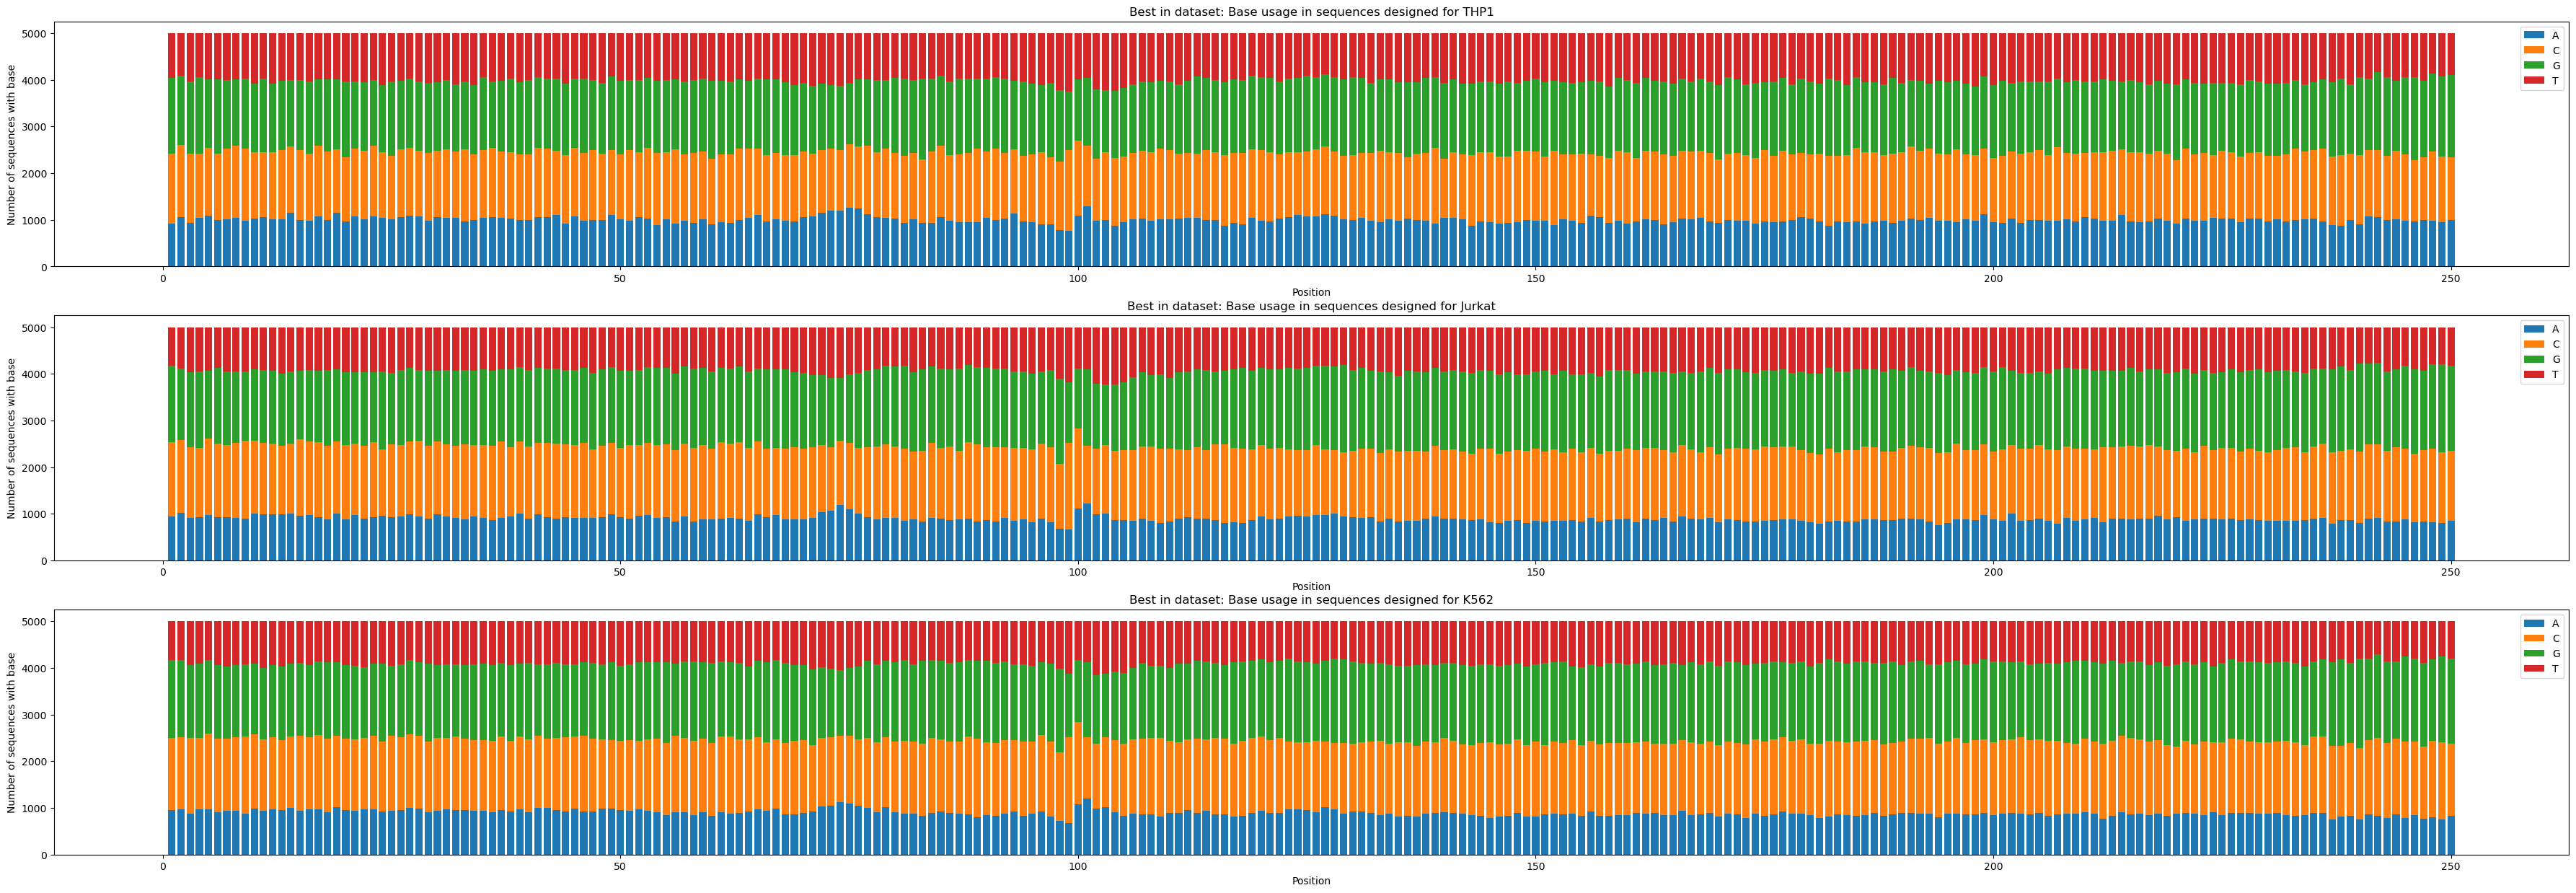

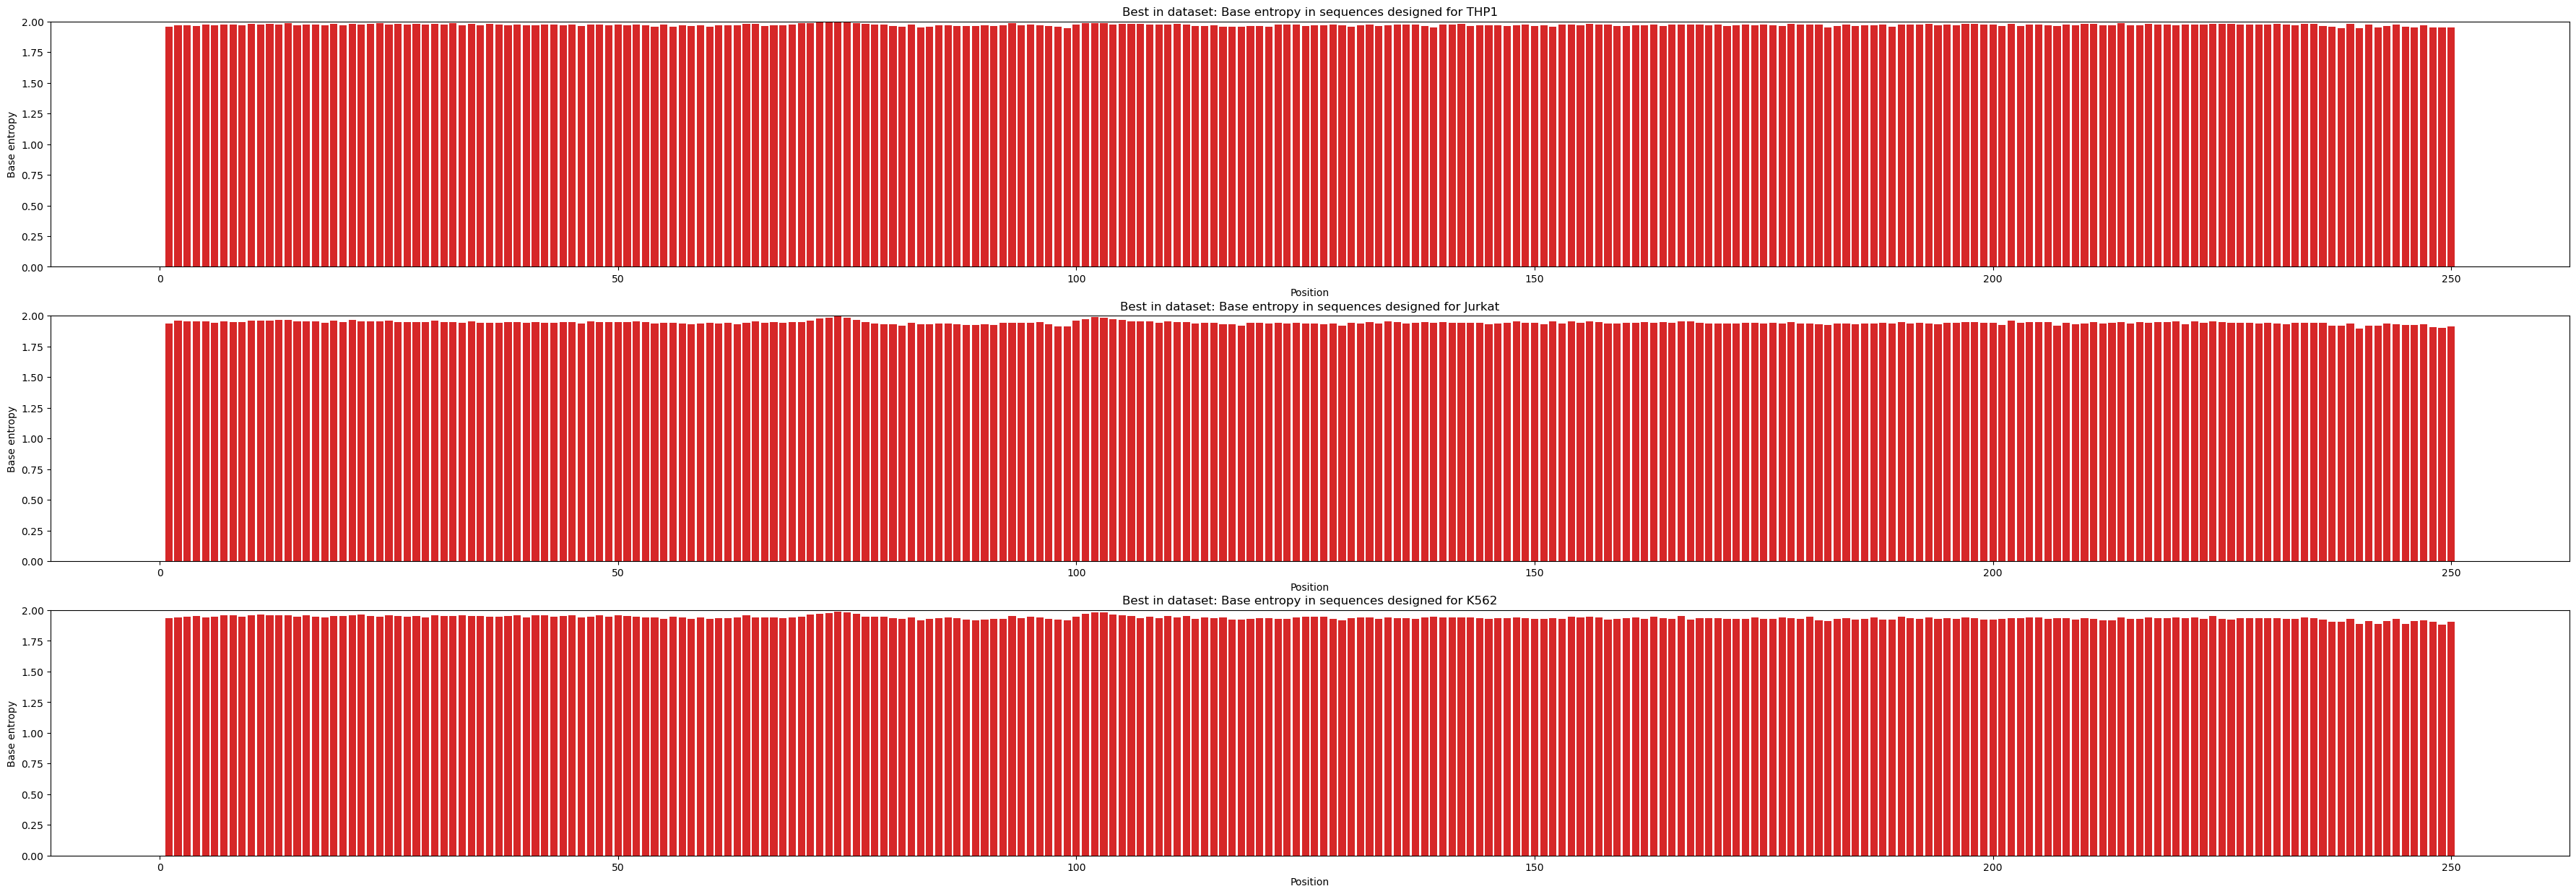

motif_tiling
thp1
jurkat
k562


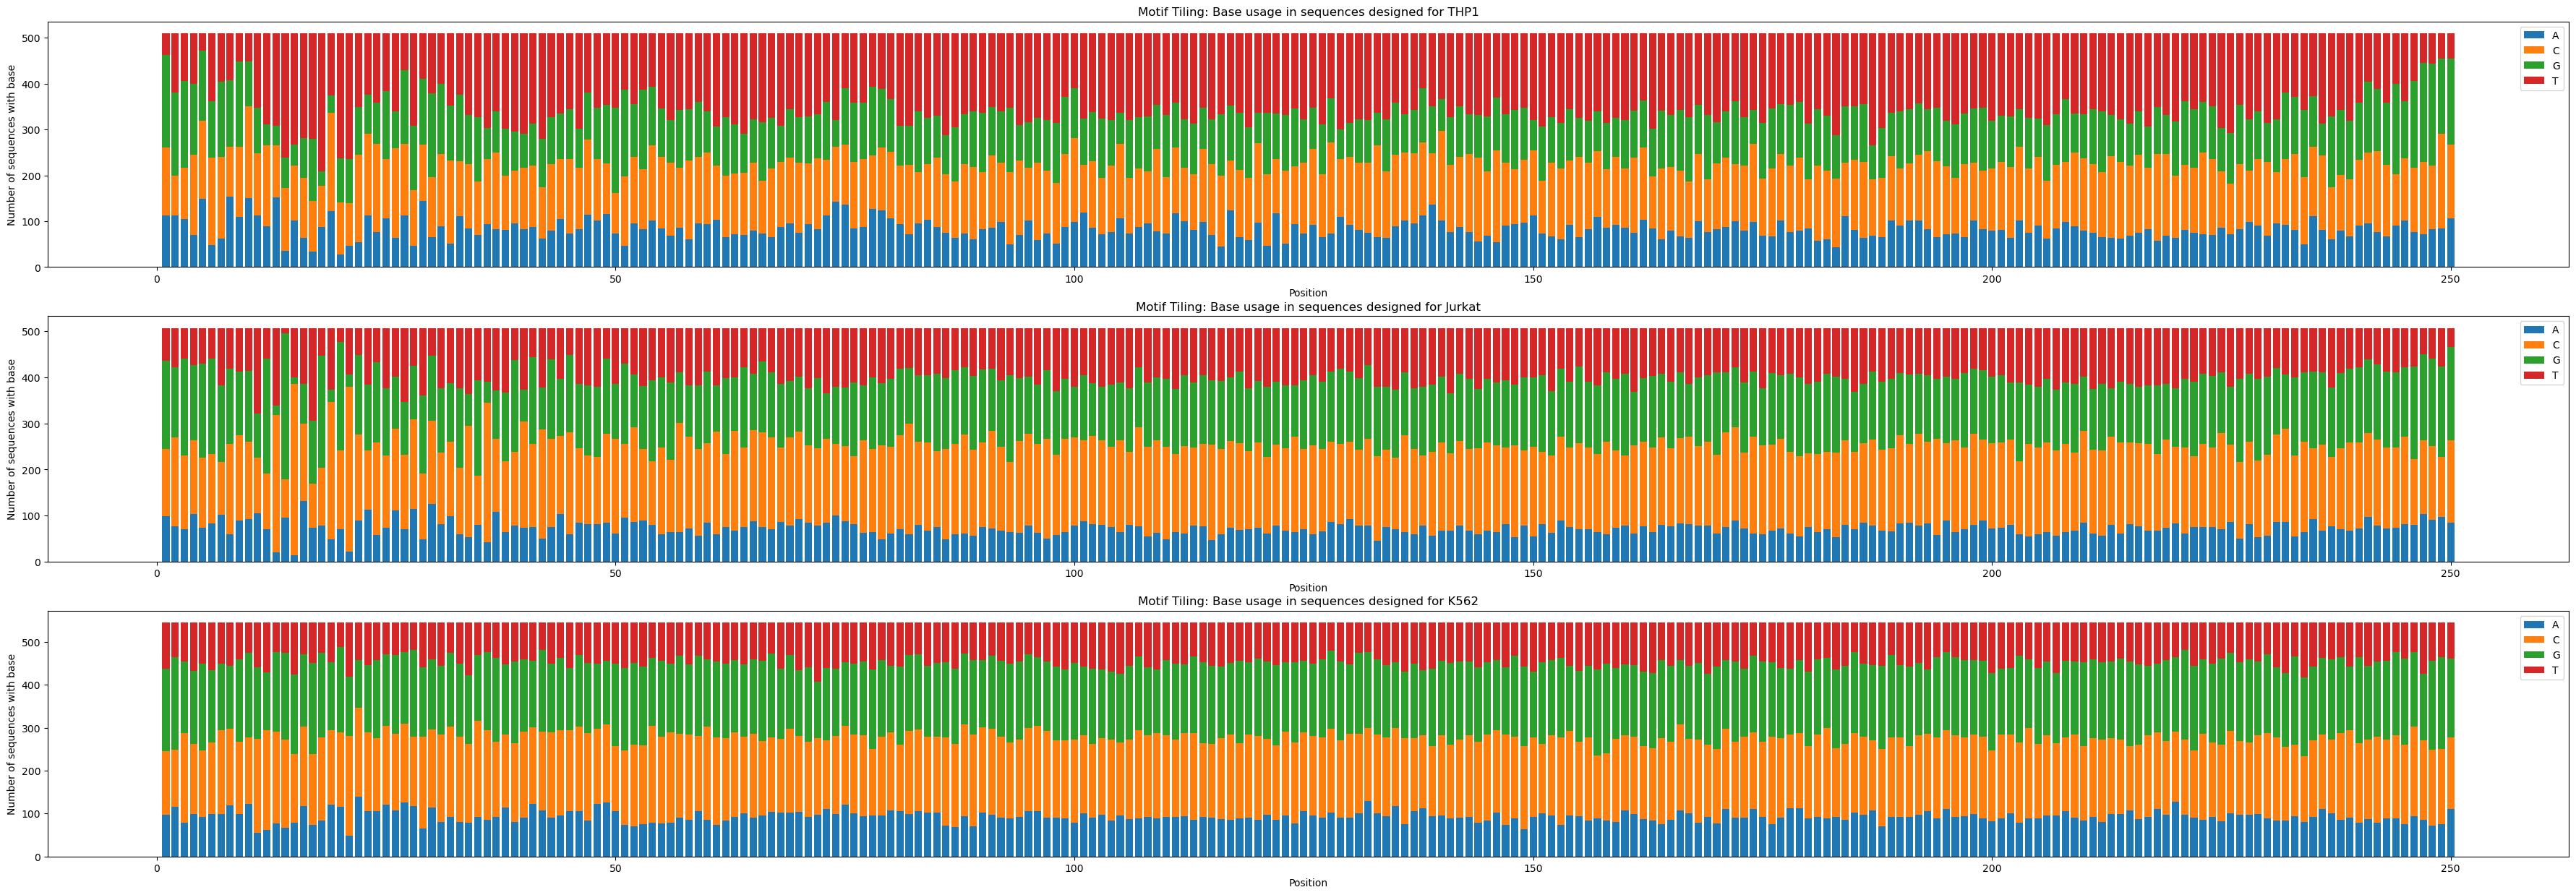

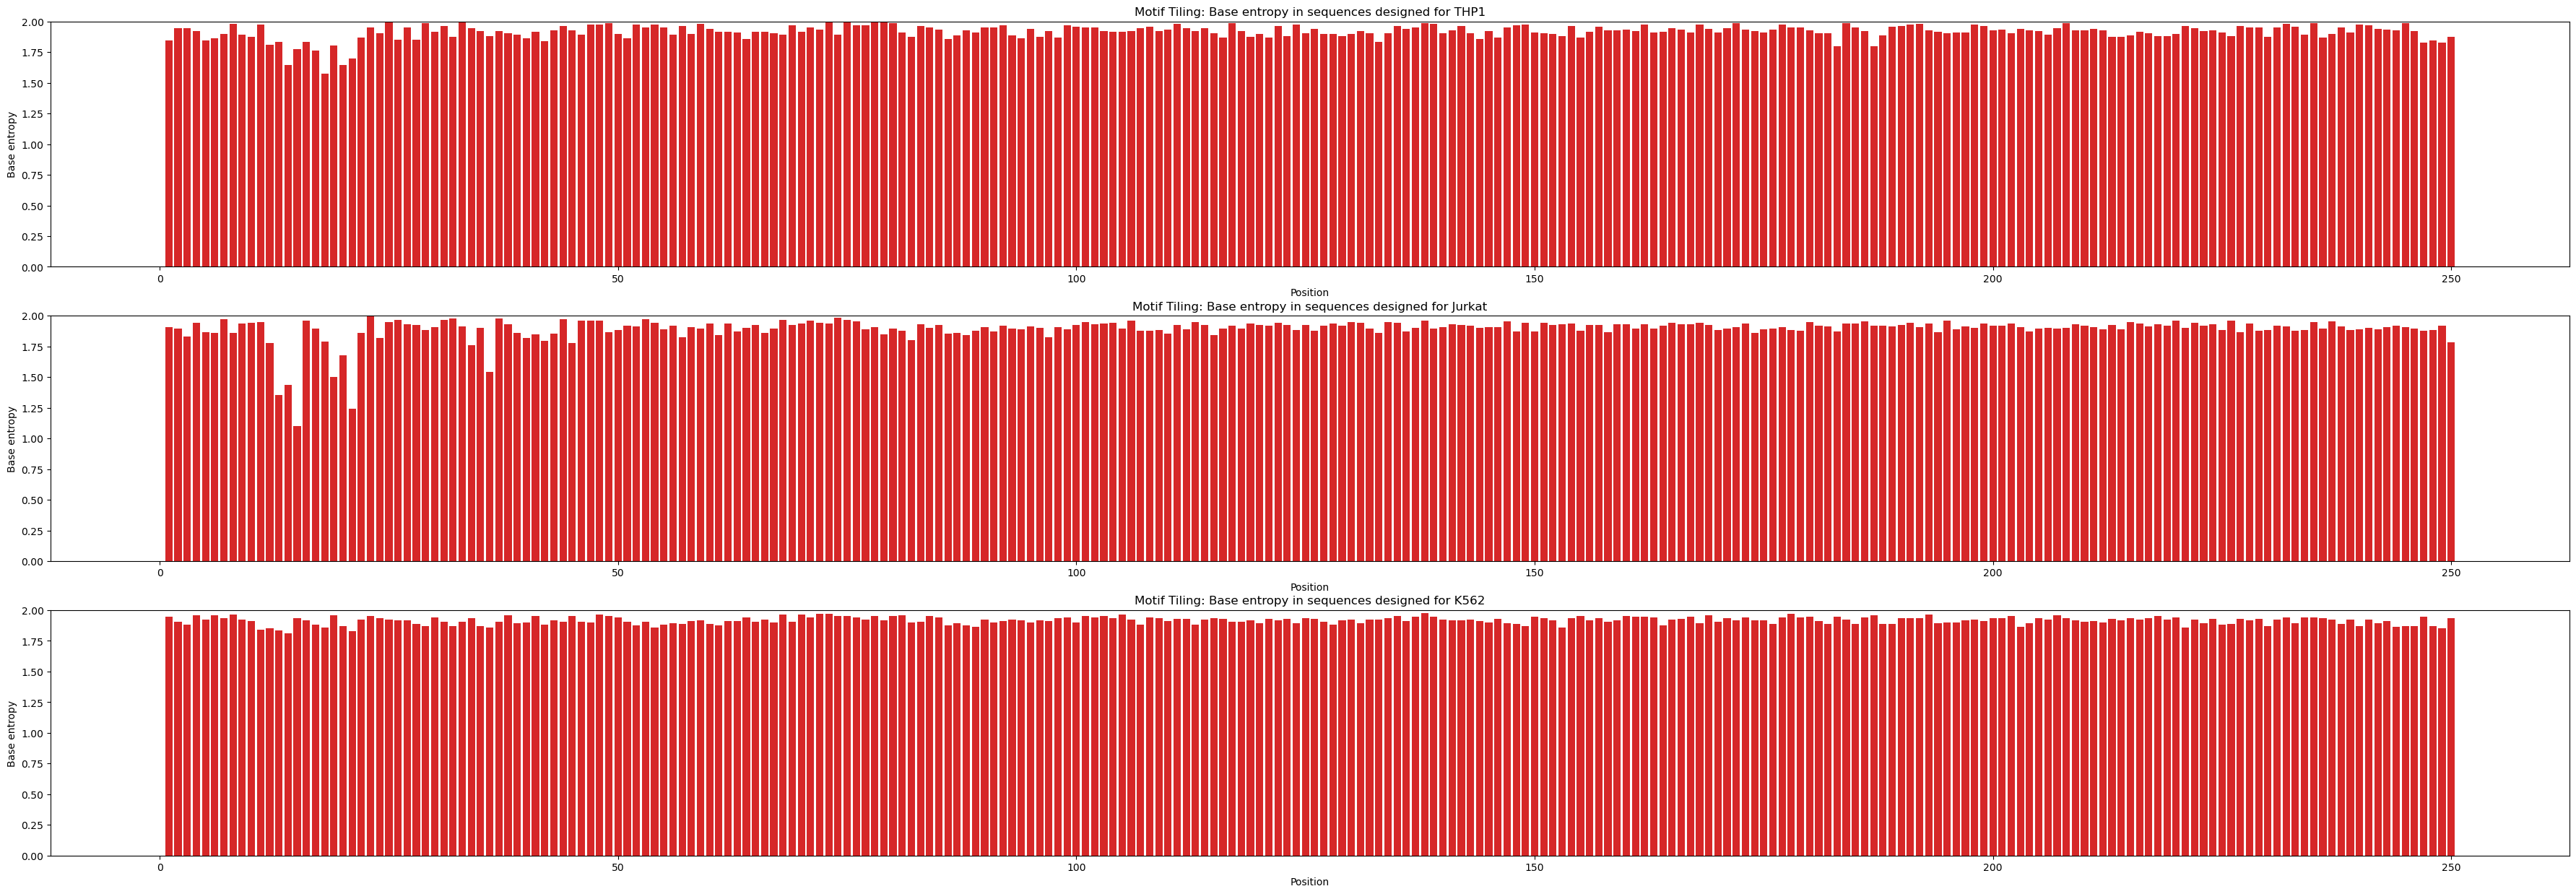

coms_final_design_v2
thp1
jurkat
k562


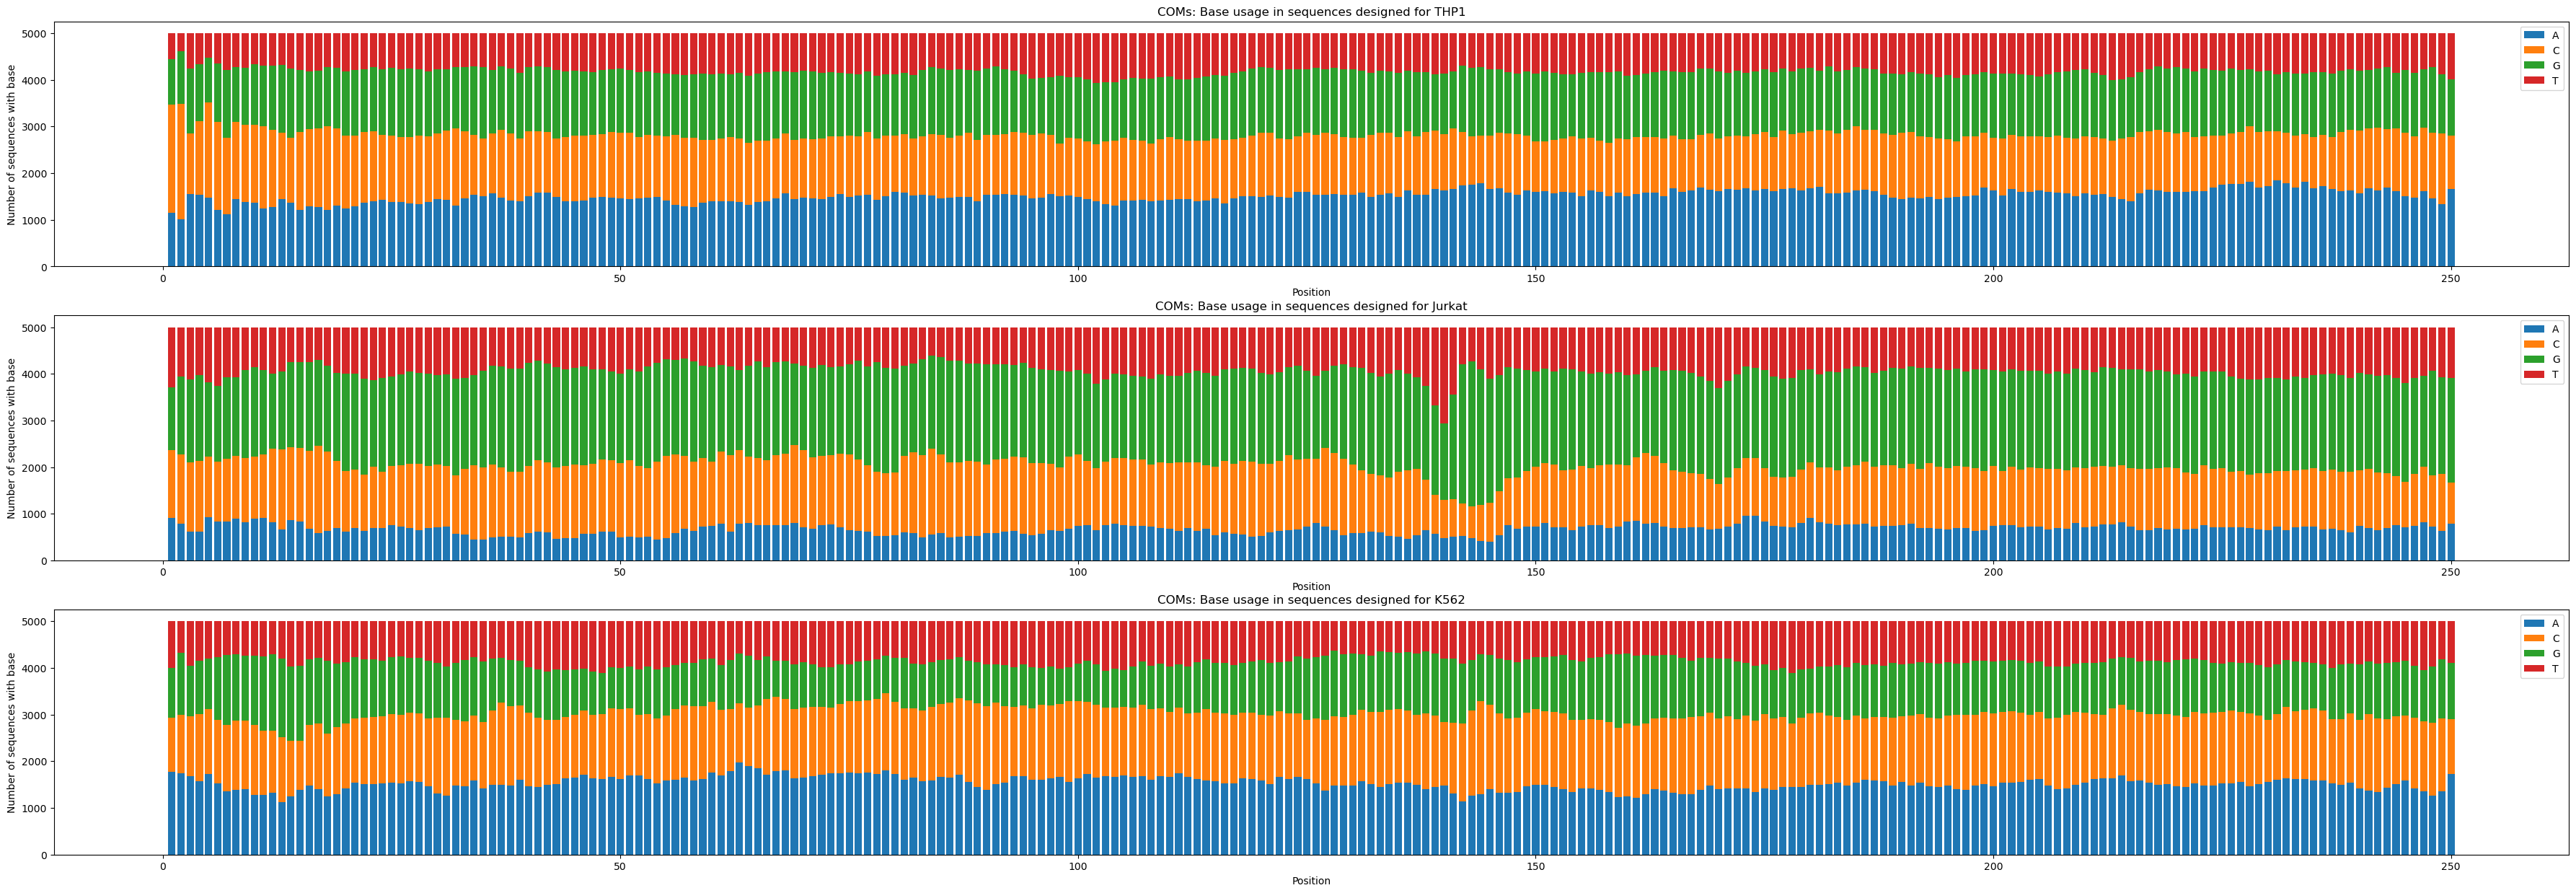

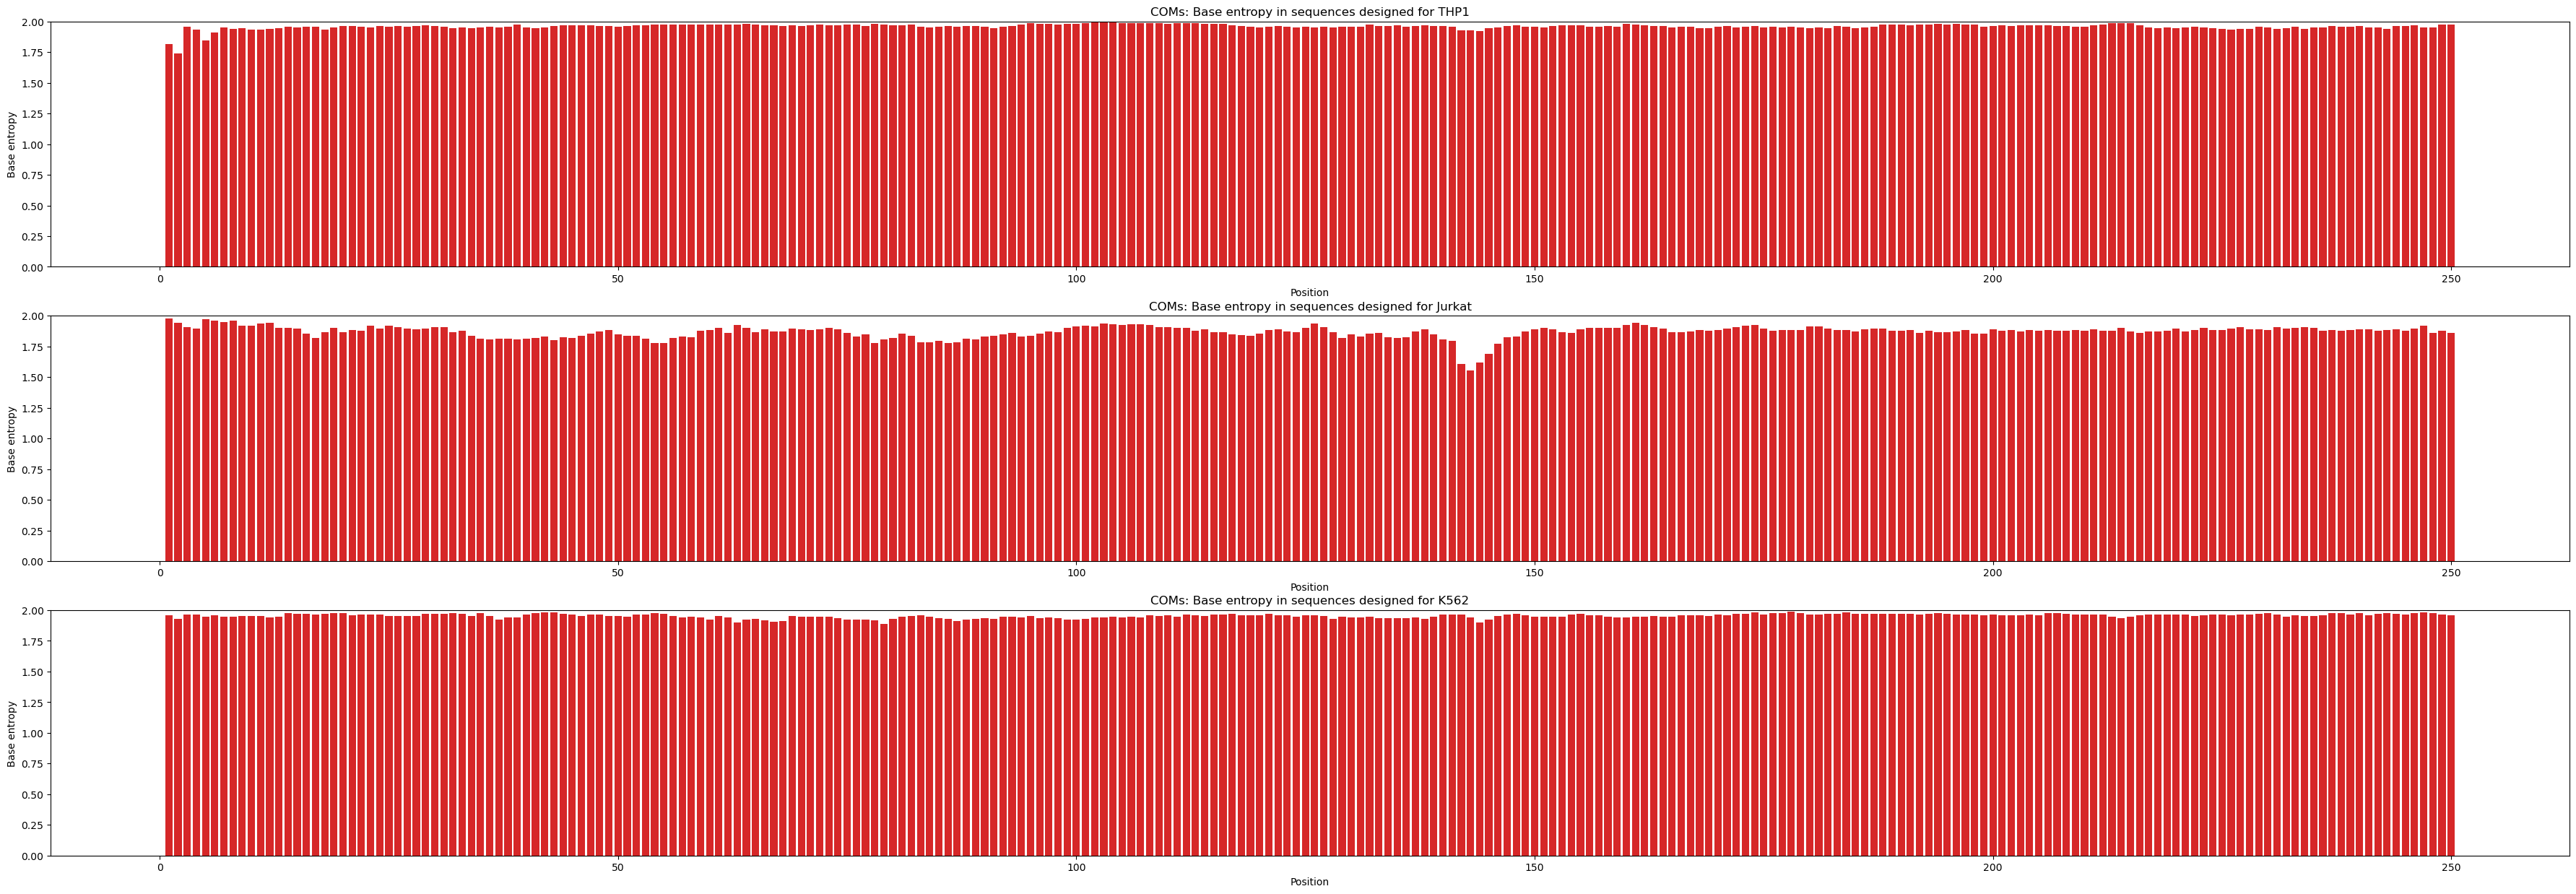

dens_final_design_v2_diversity_0.0
thp1
jurkat
k562


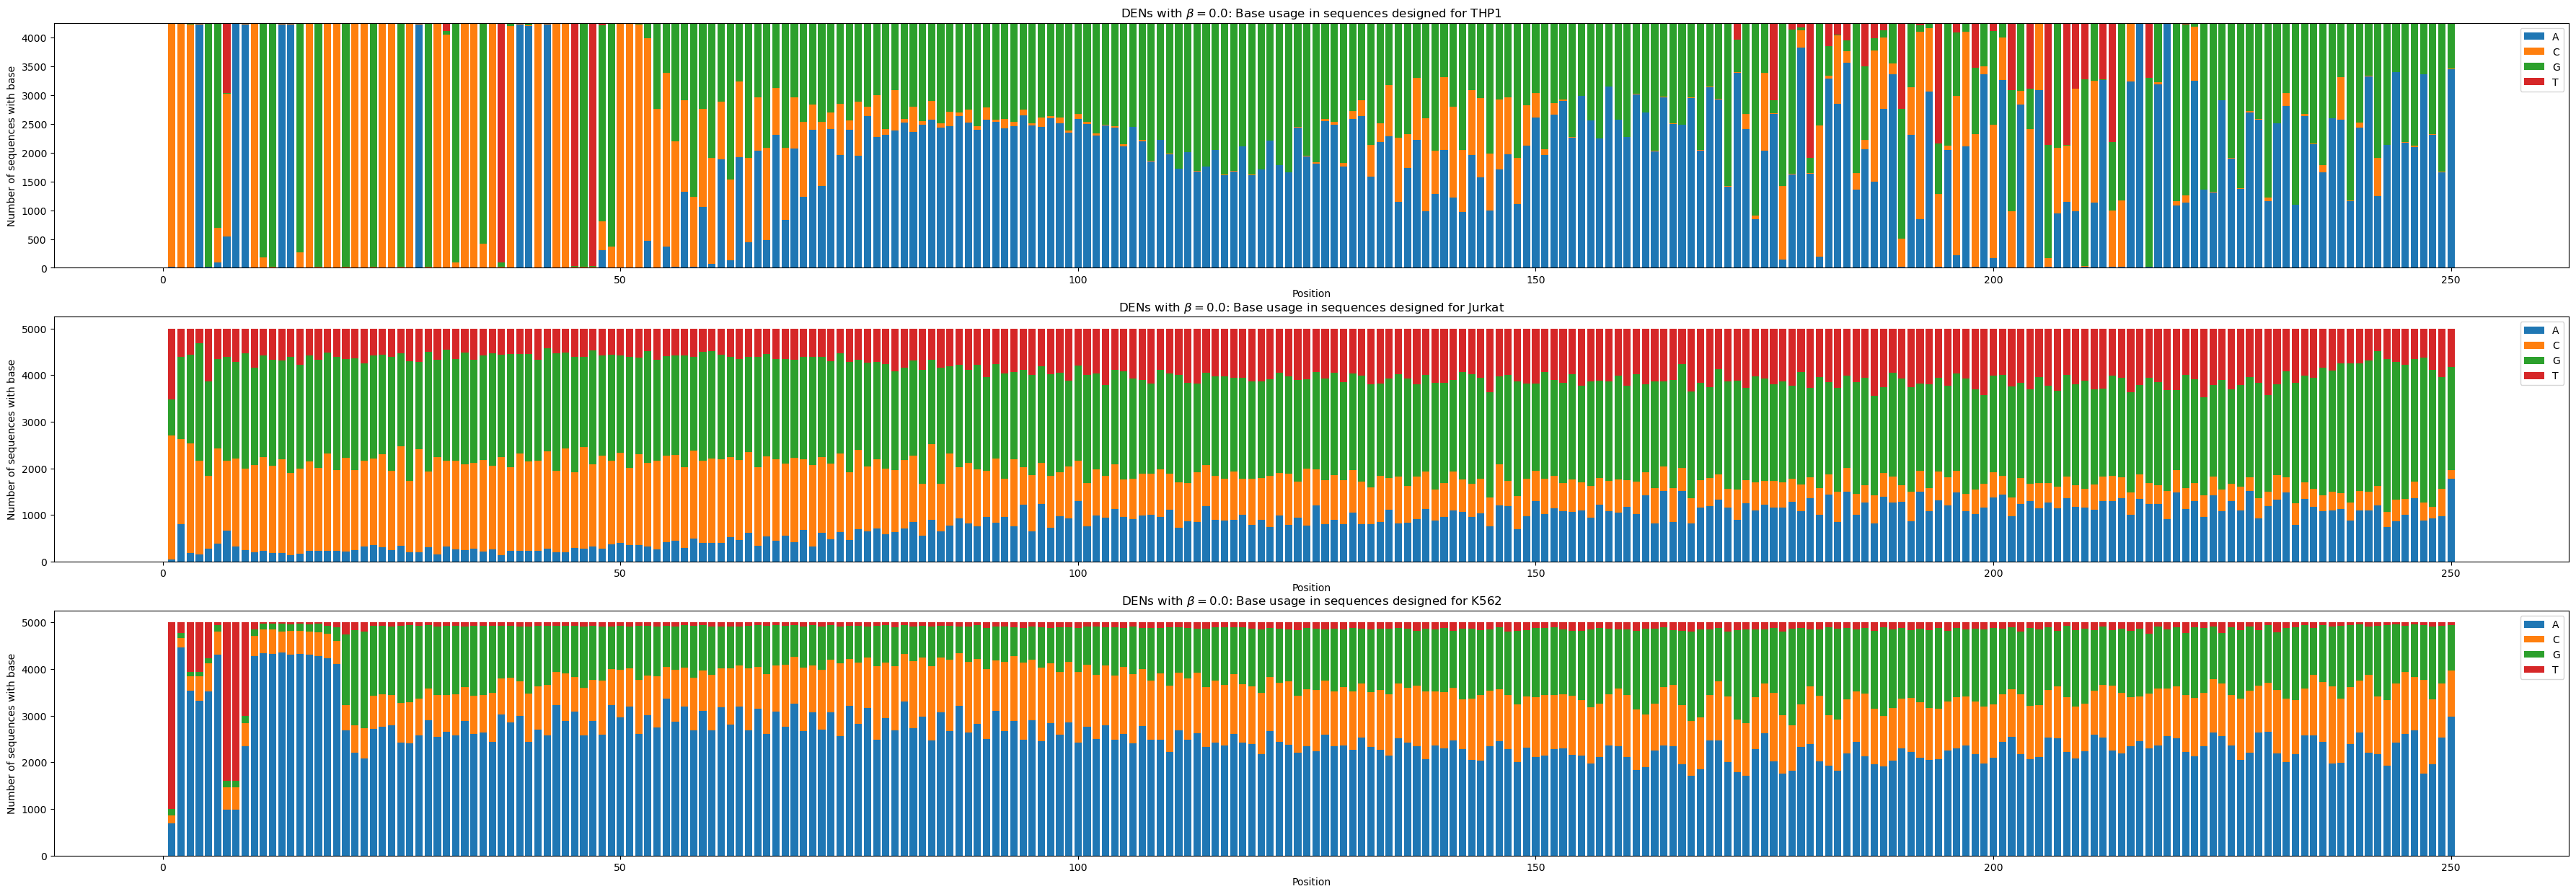

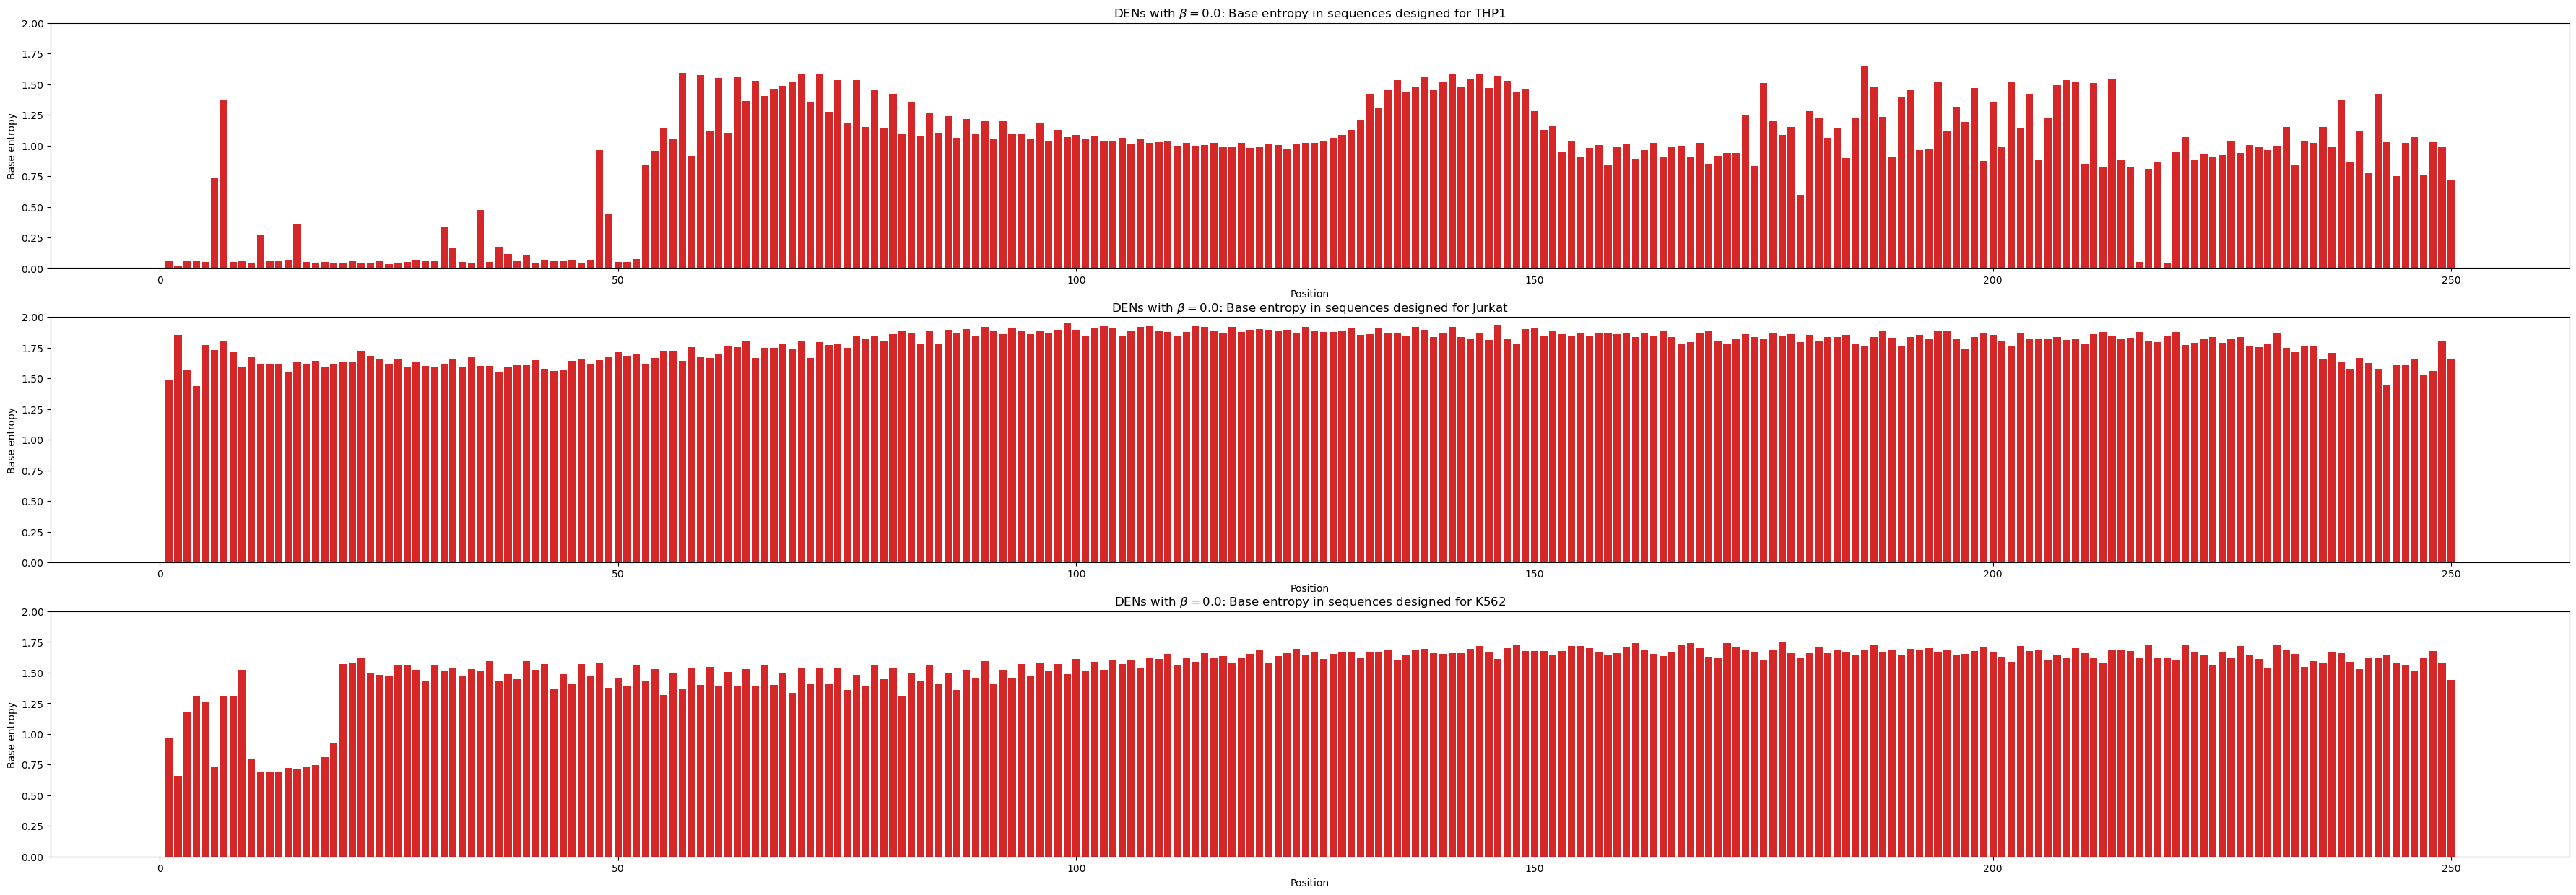

dens_final_design_v2_diversity_0.1
thp1
jurkat
k562


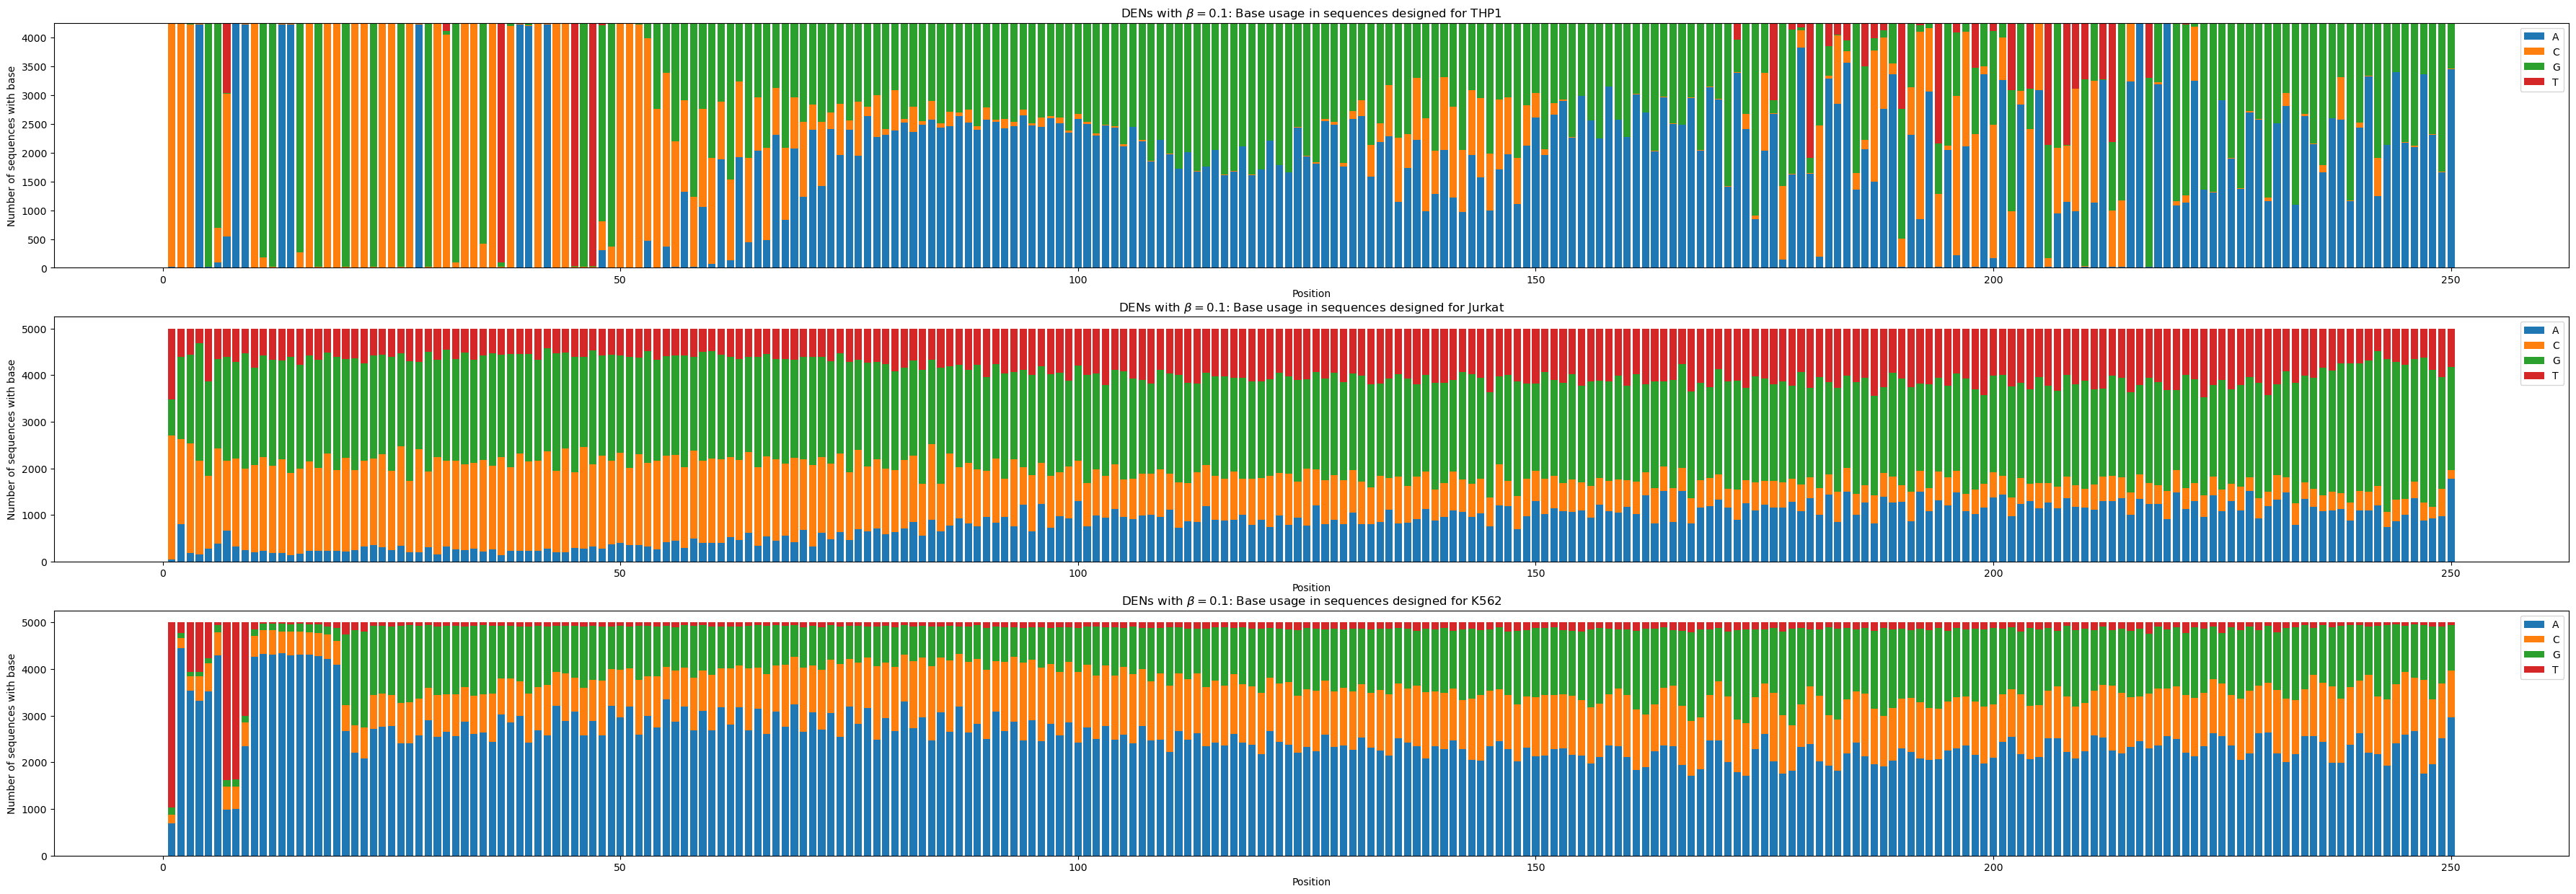

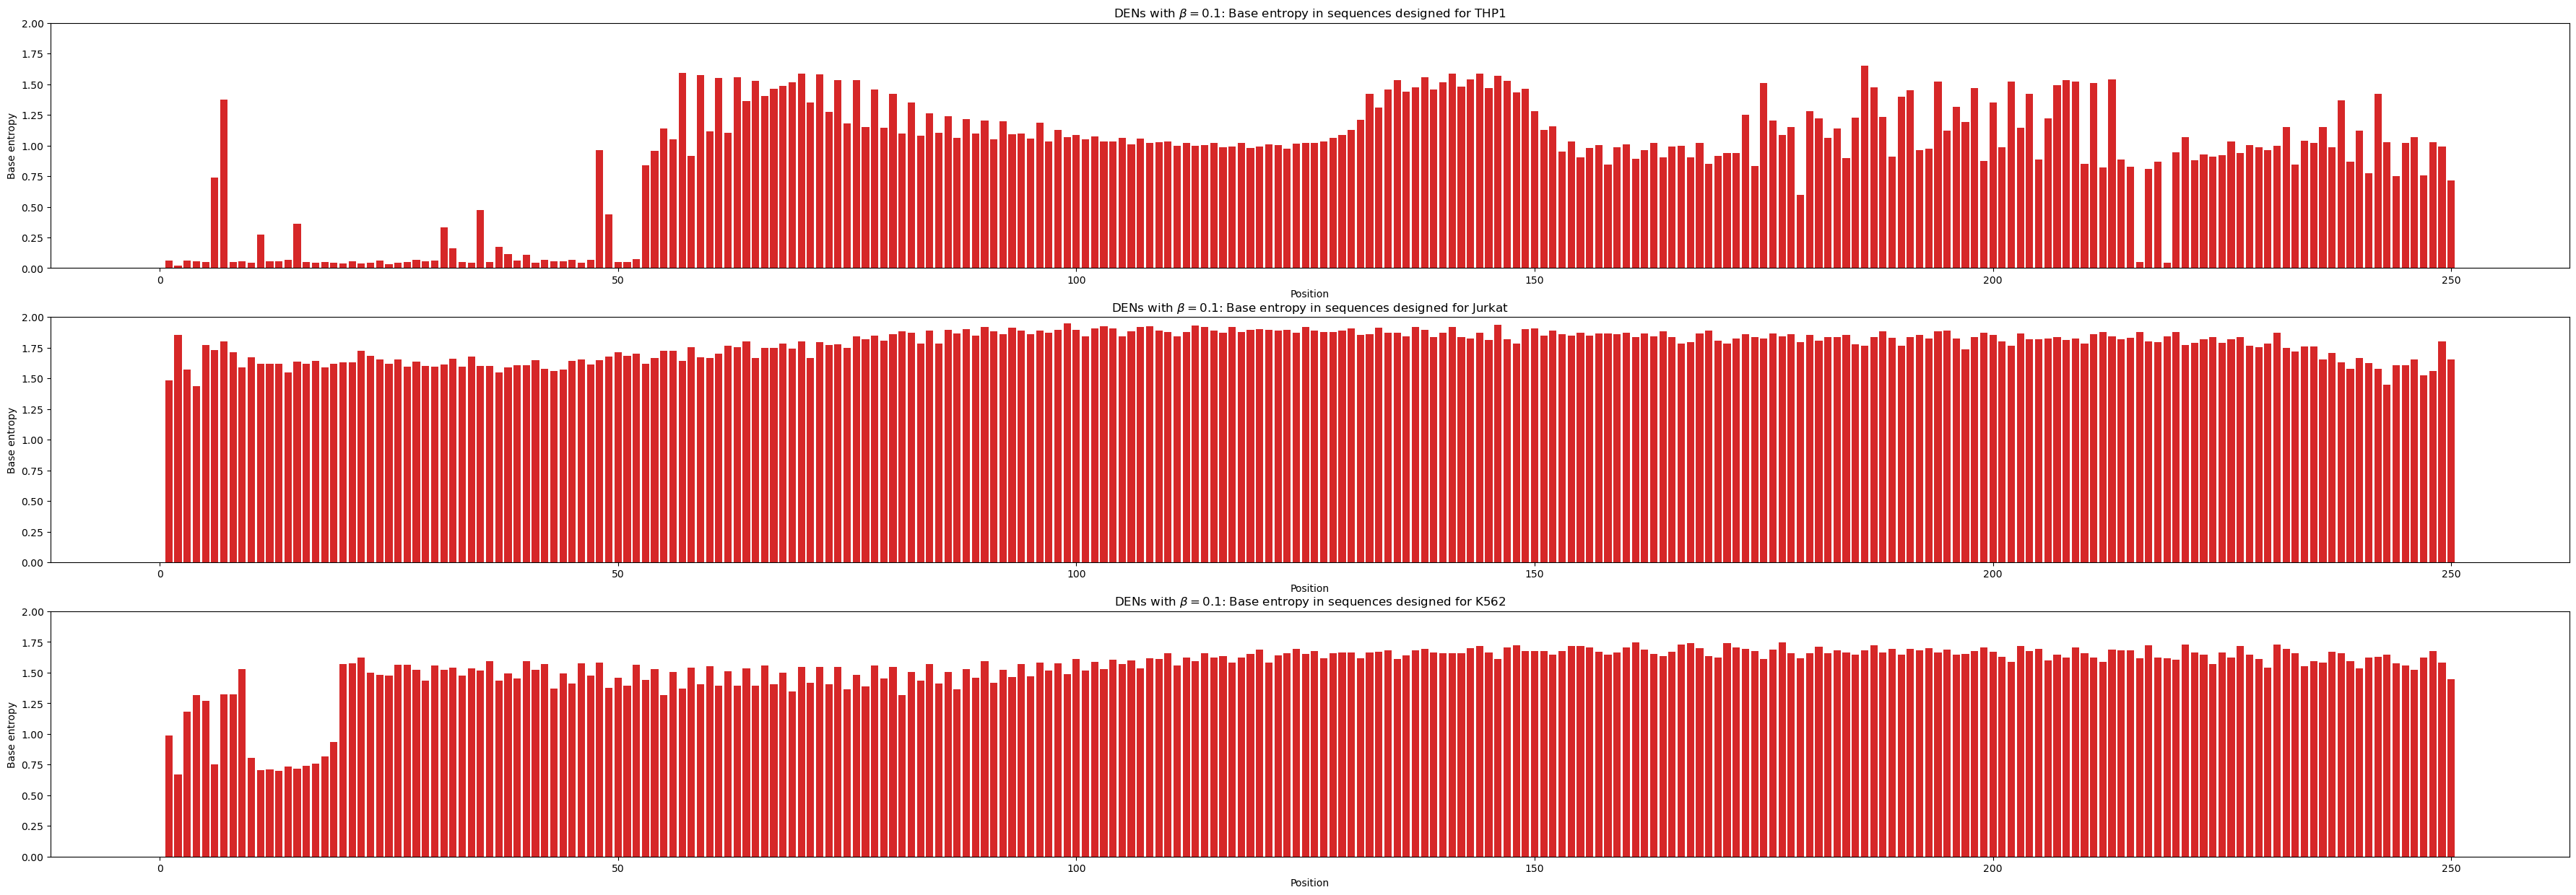

dens_final_design_v2_diversity_0.3
thp1
jurkat
k562


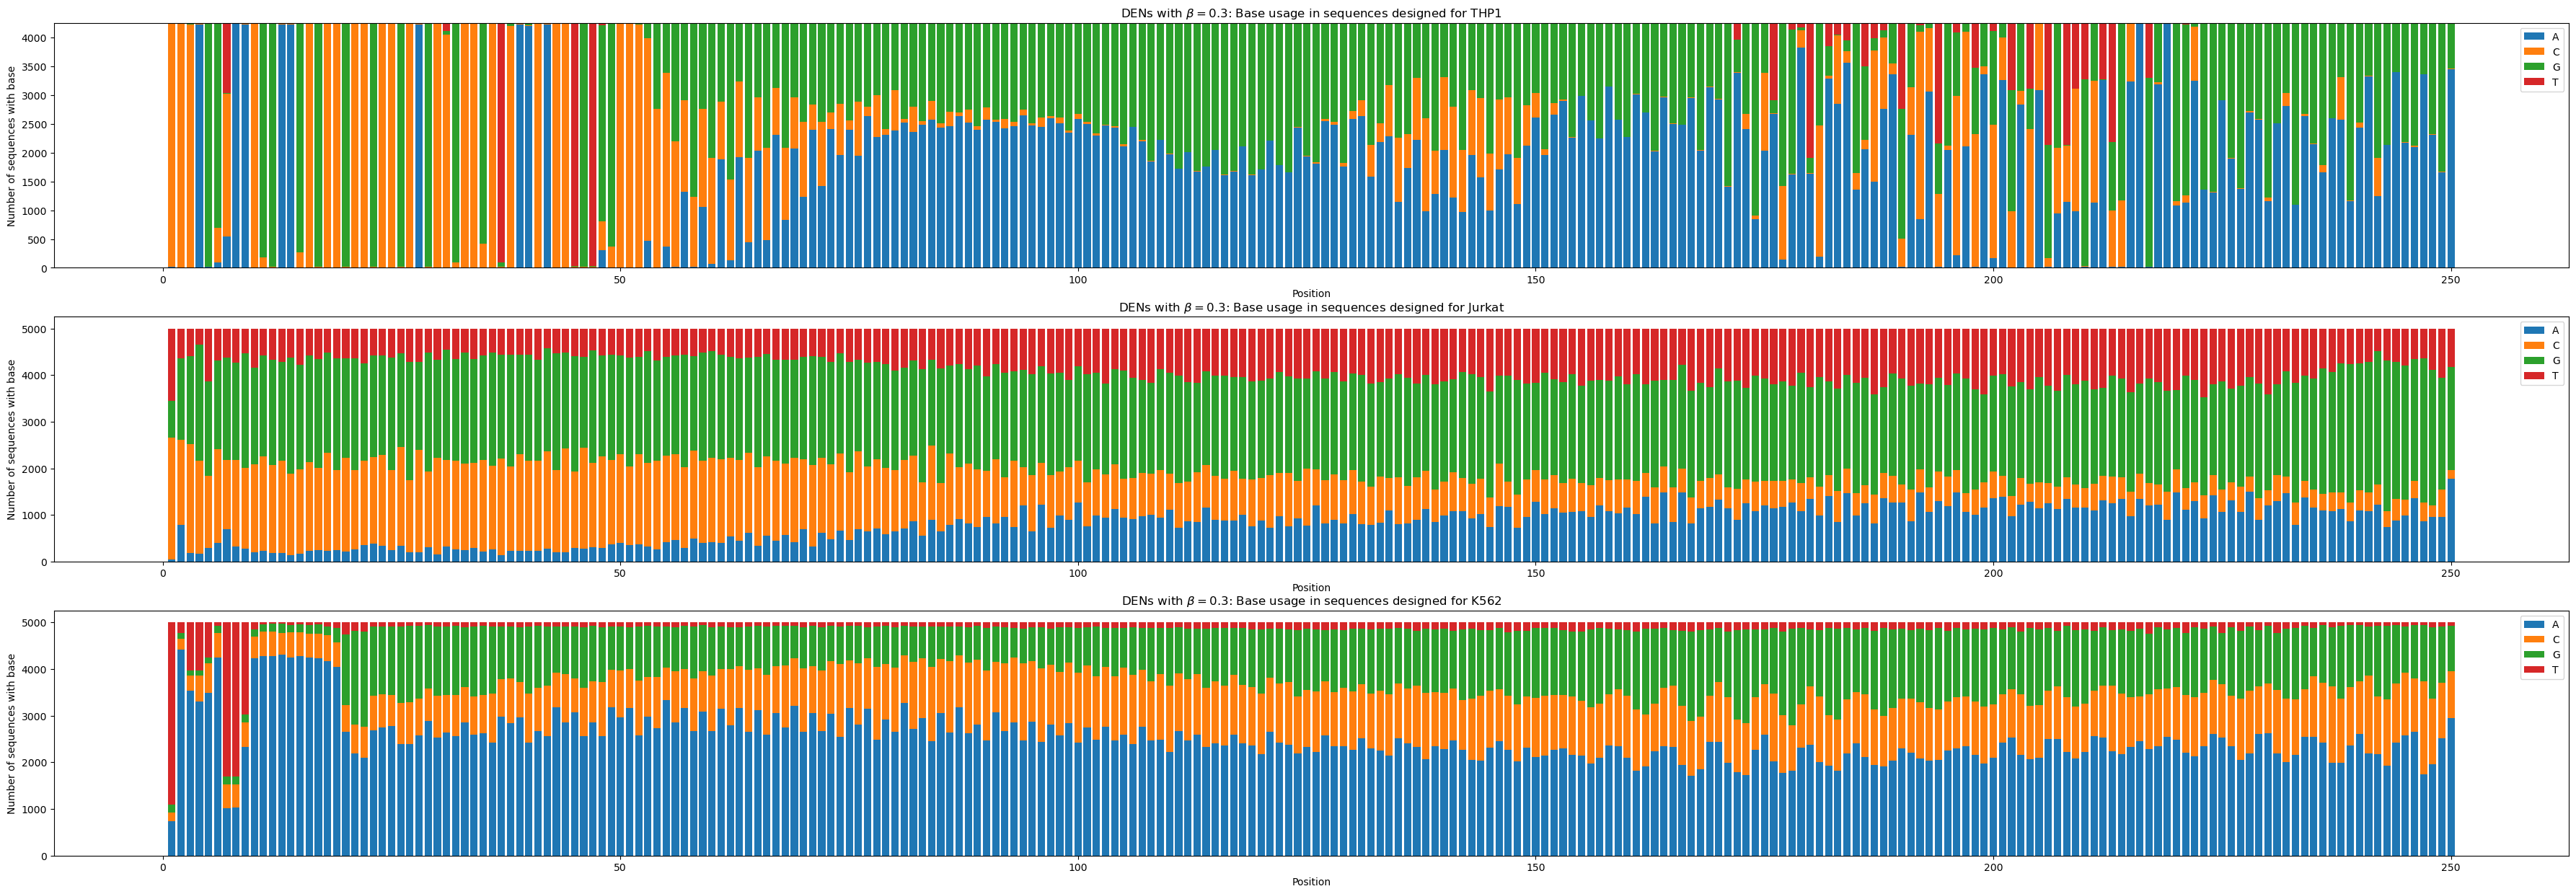

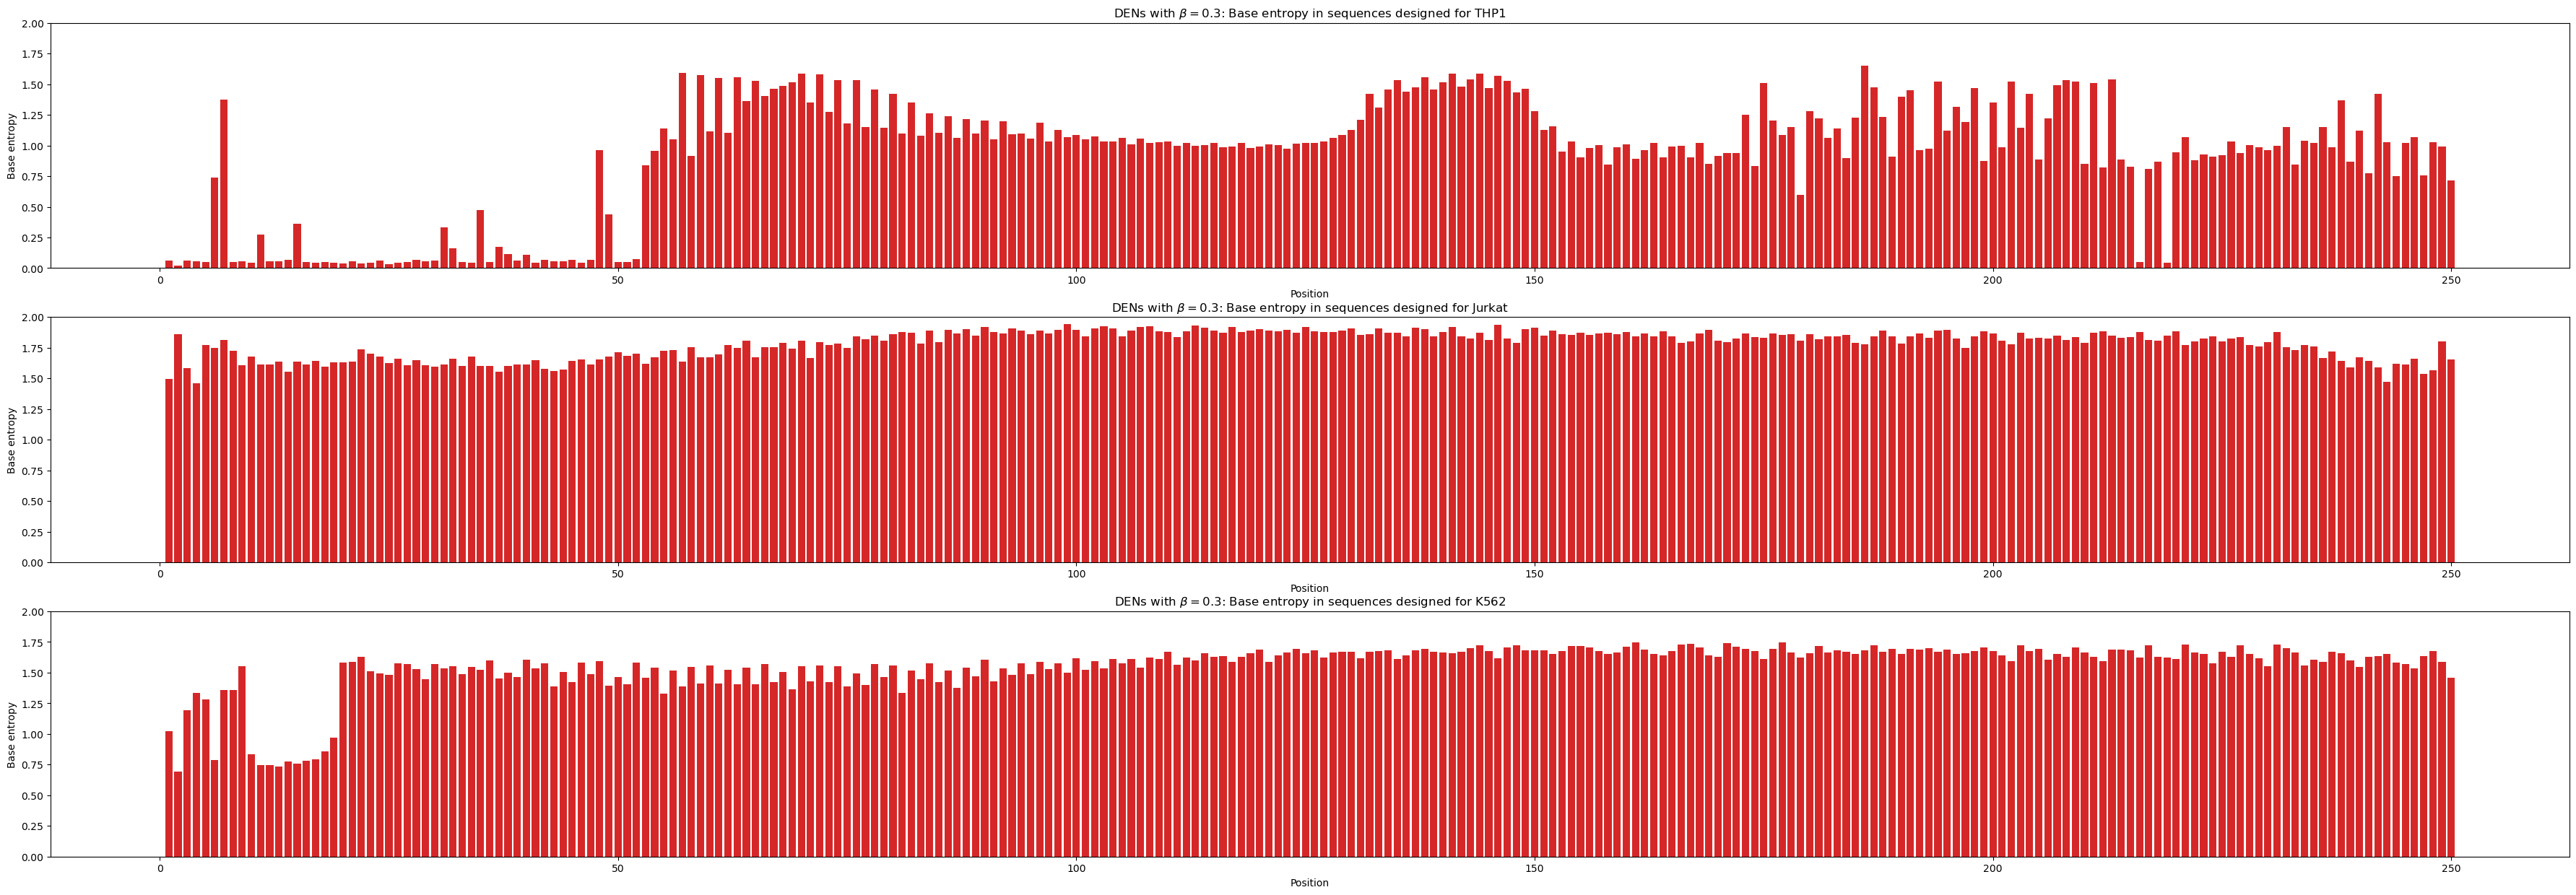

dens_final_design_v2_diversity_1.0
thp1
jurkat
k562


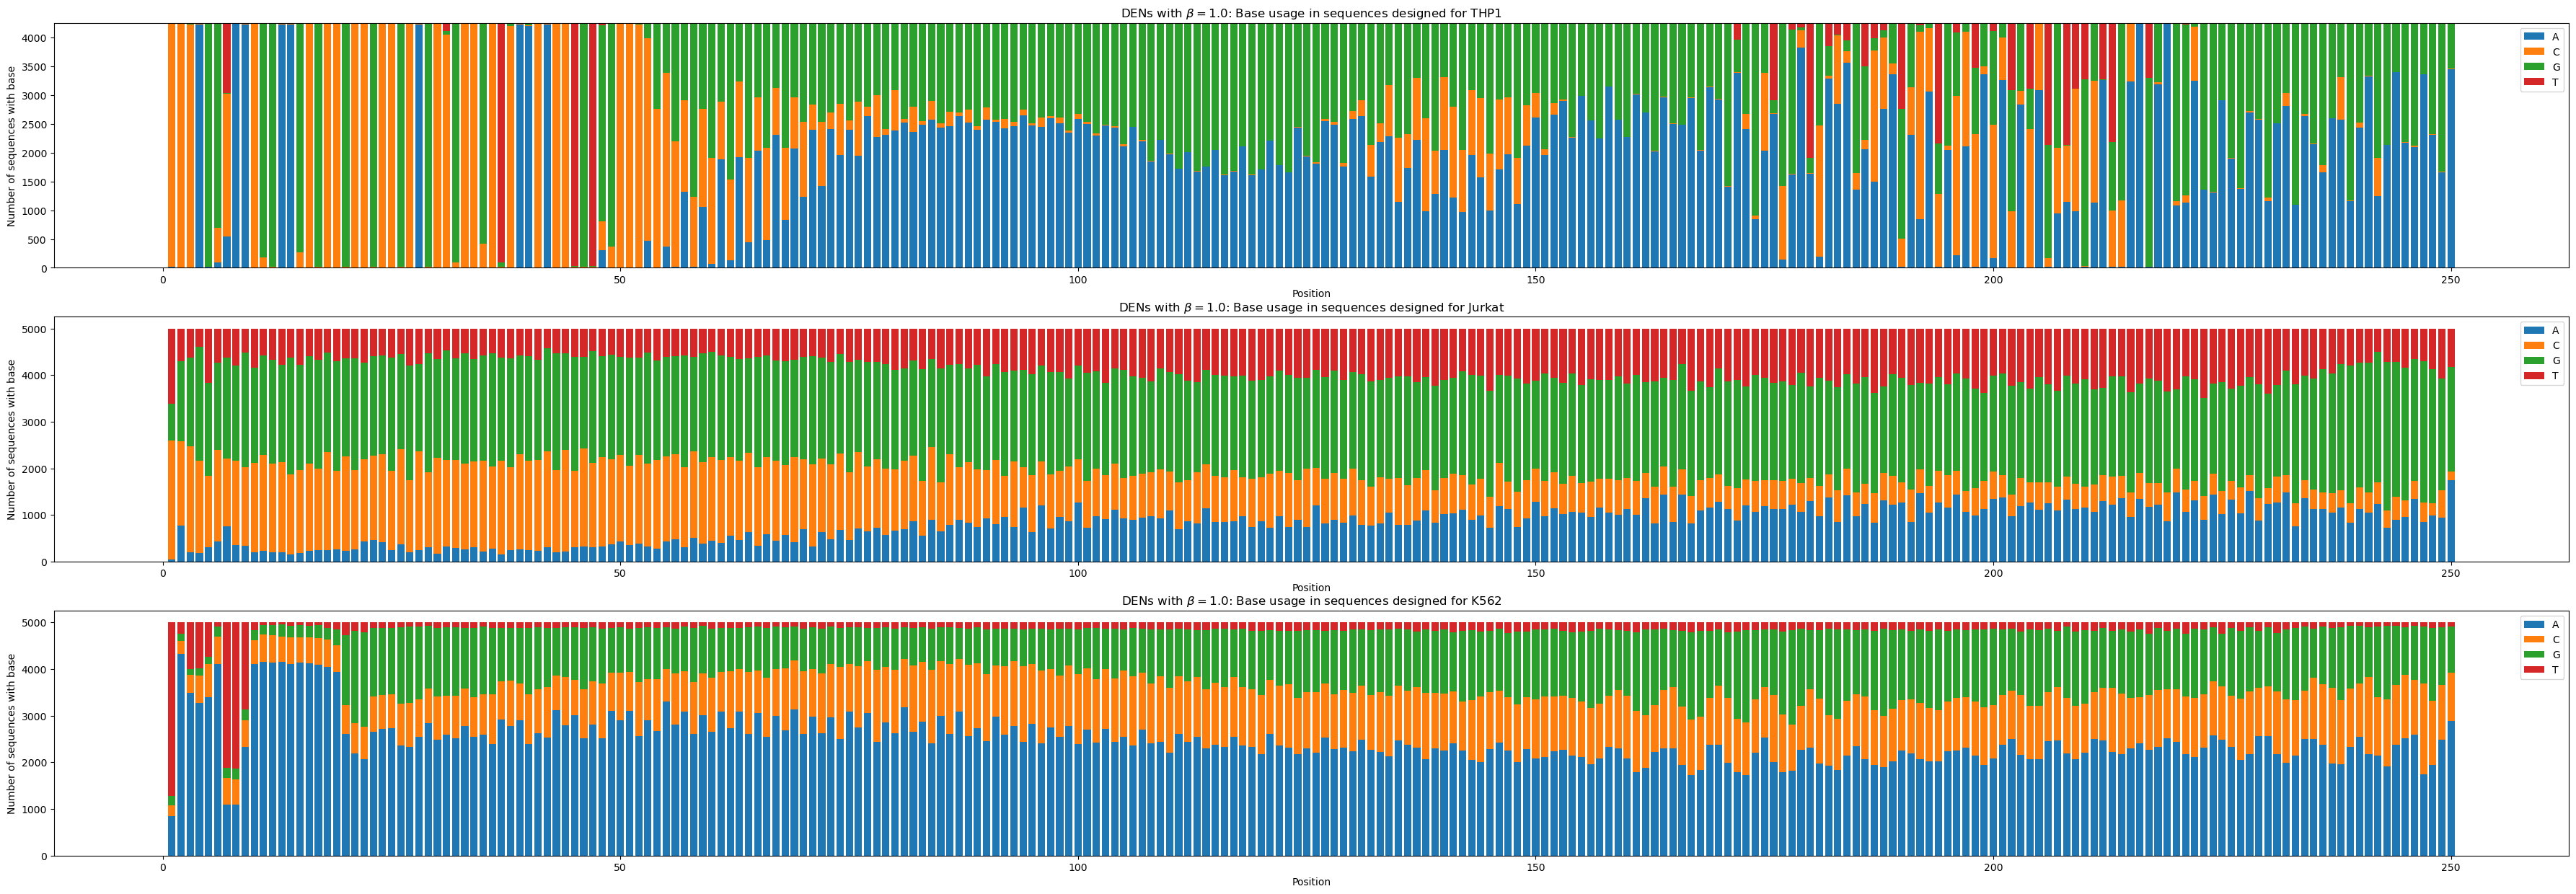

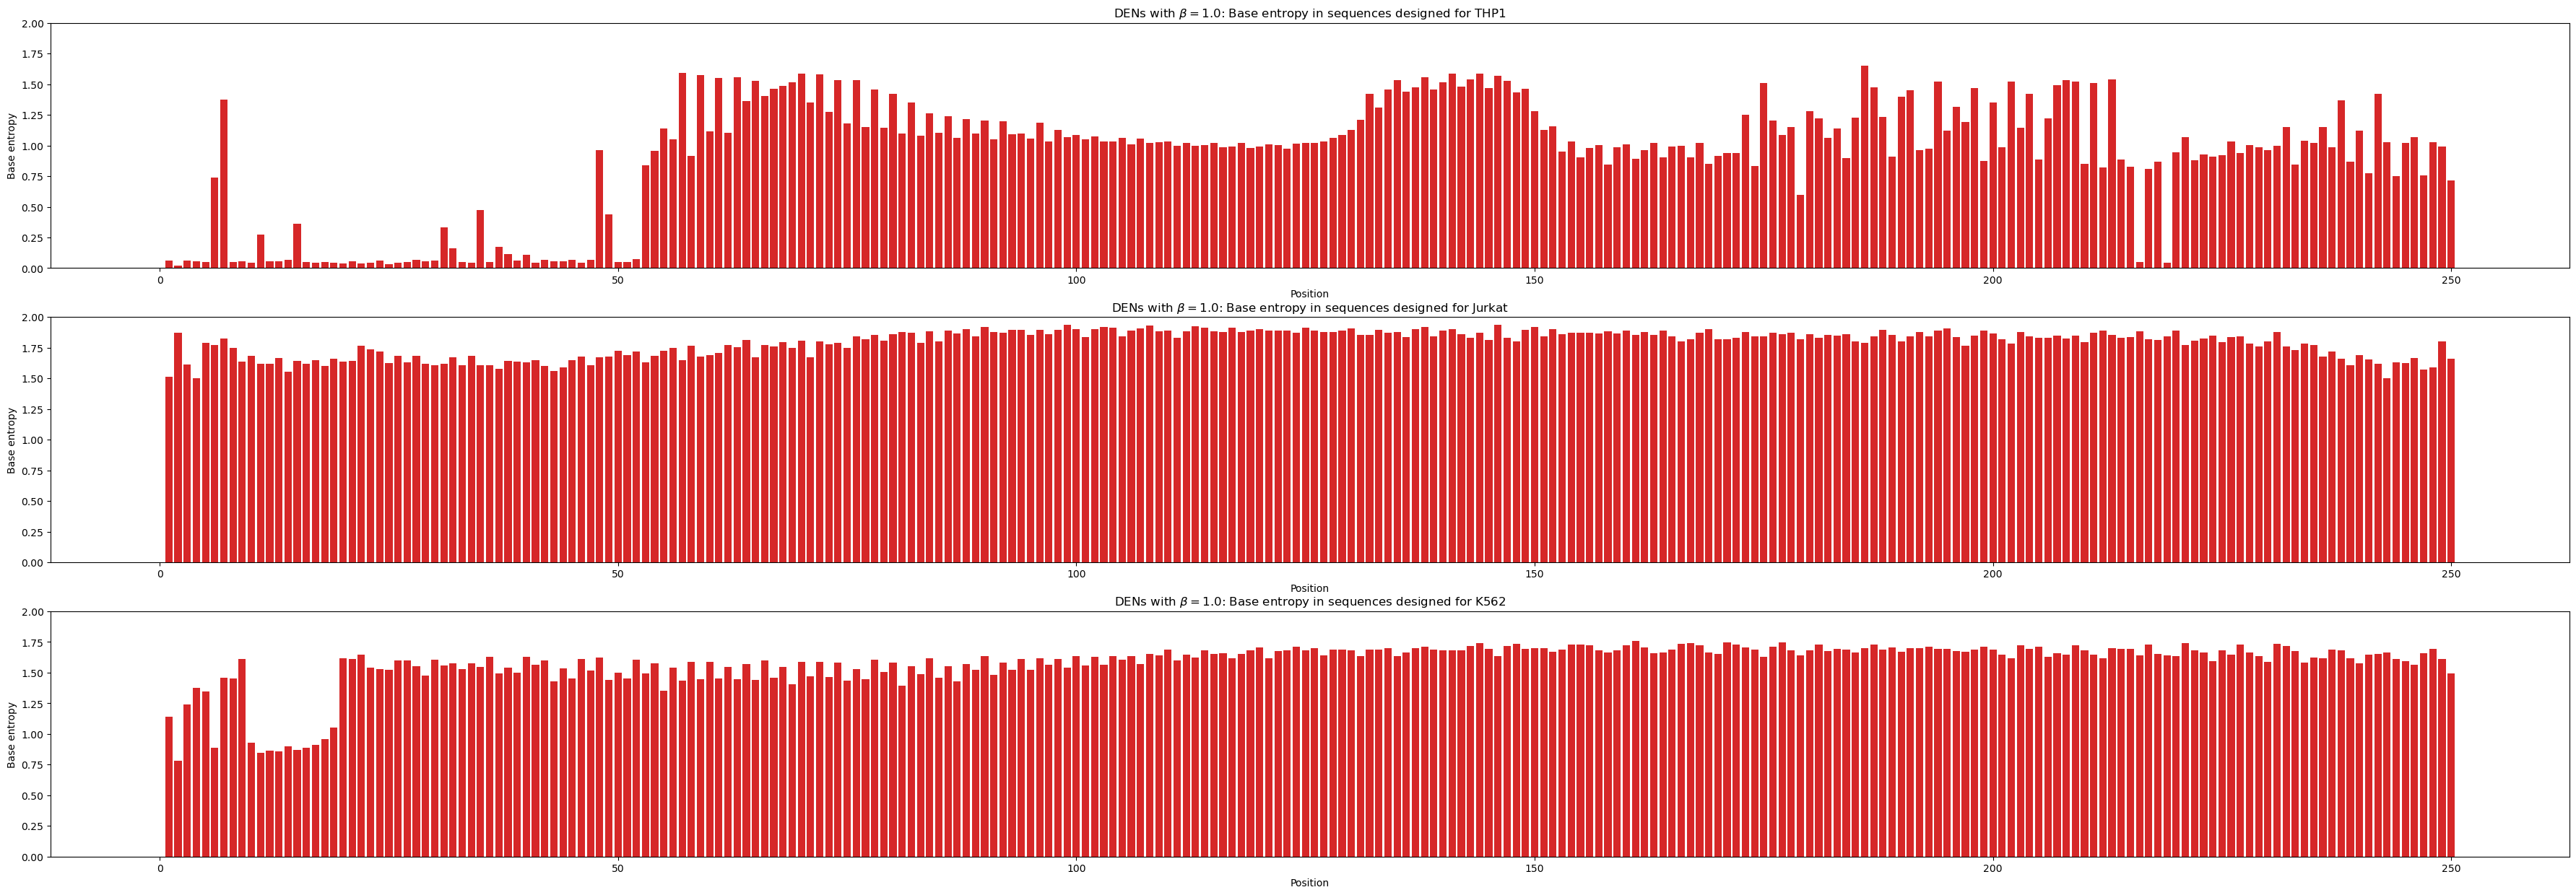

dens_final_design_v2_diversity_3.0
thp1
jurkat
k562


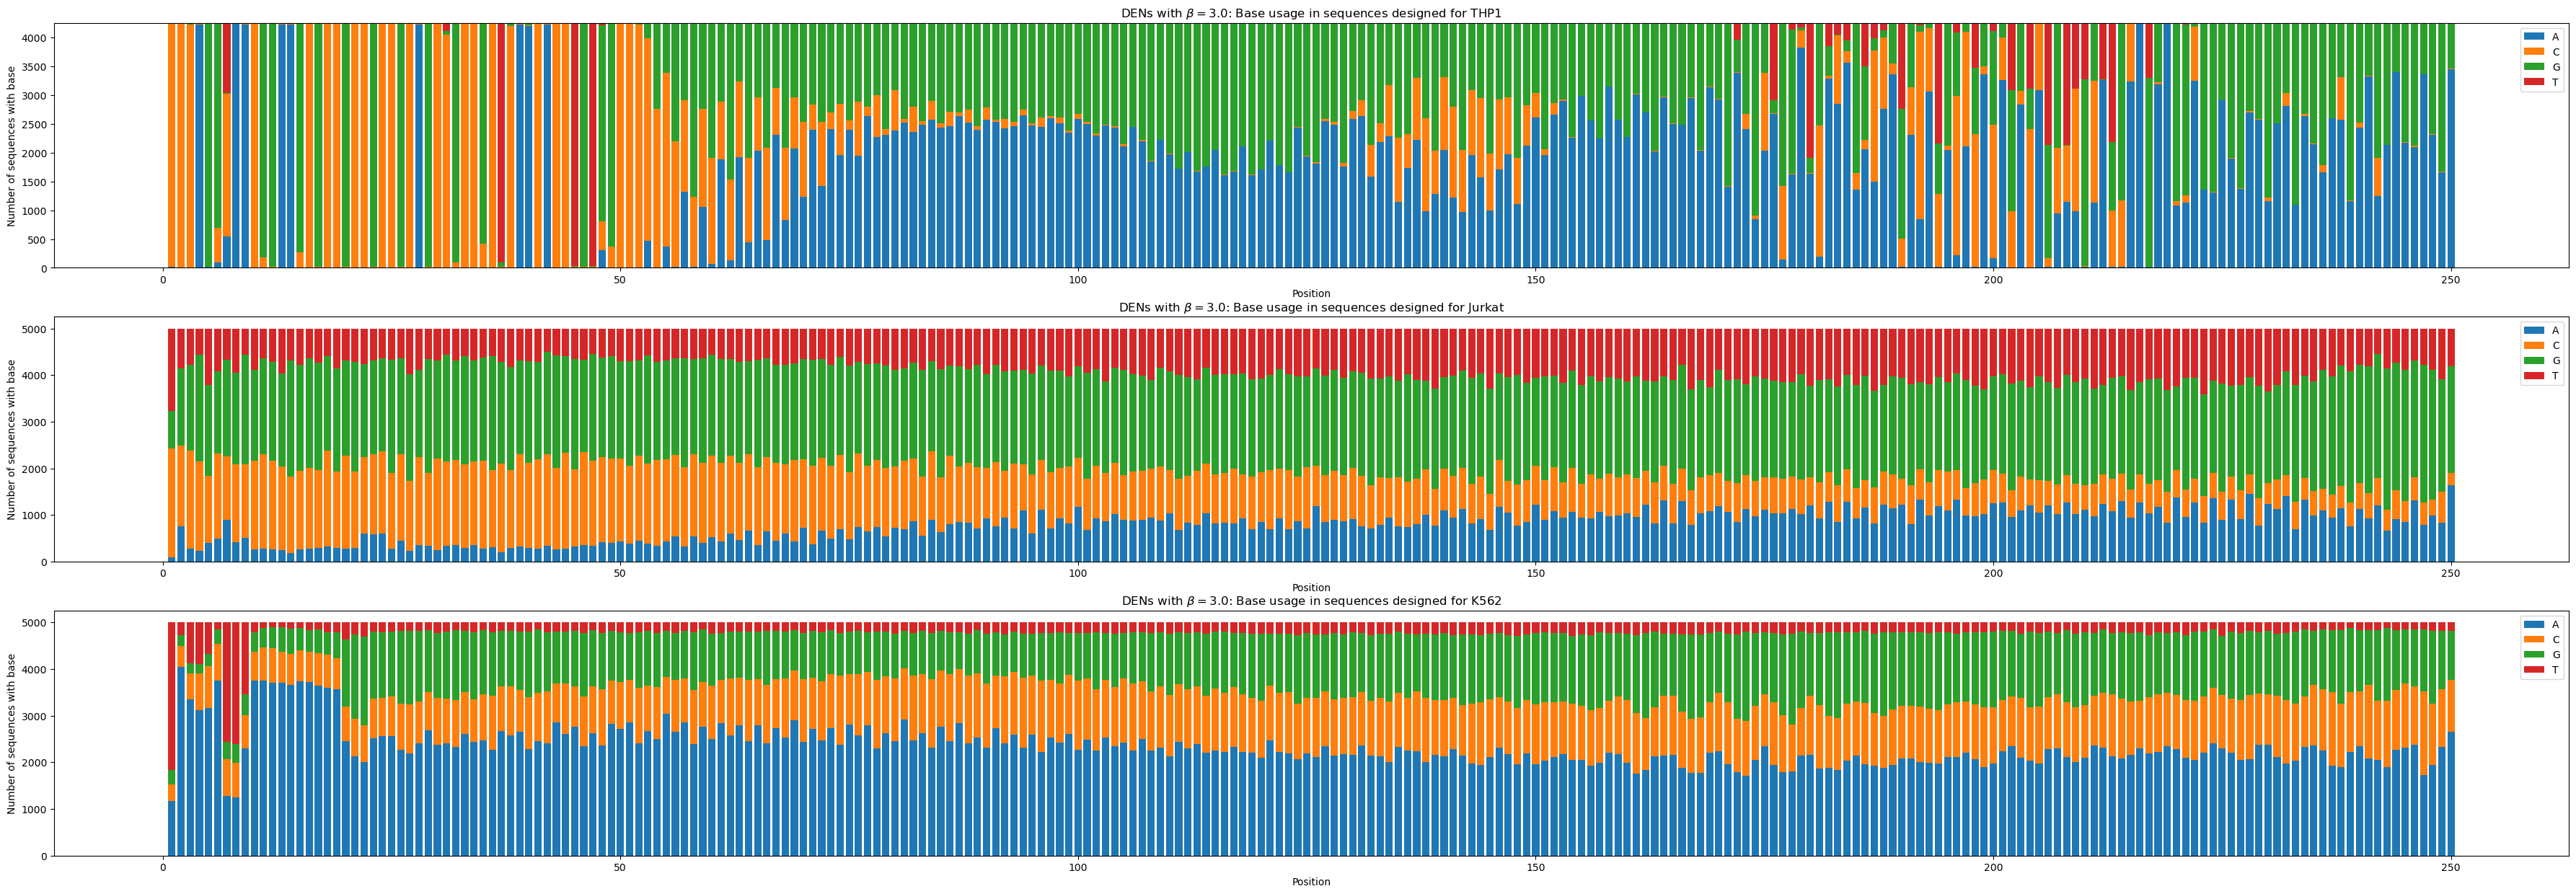

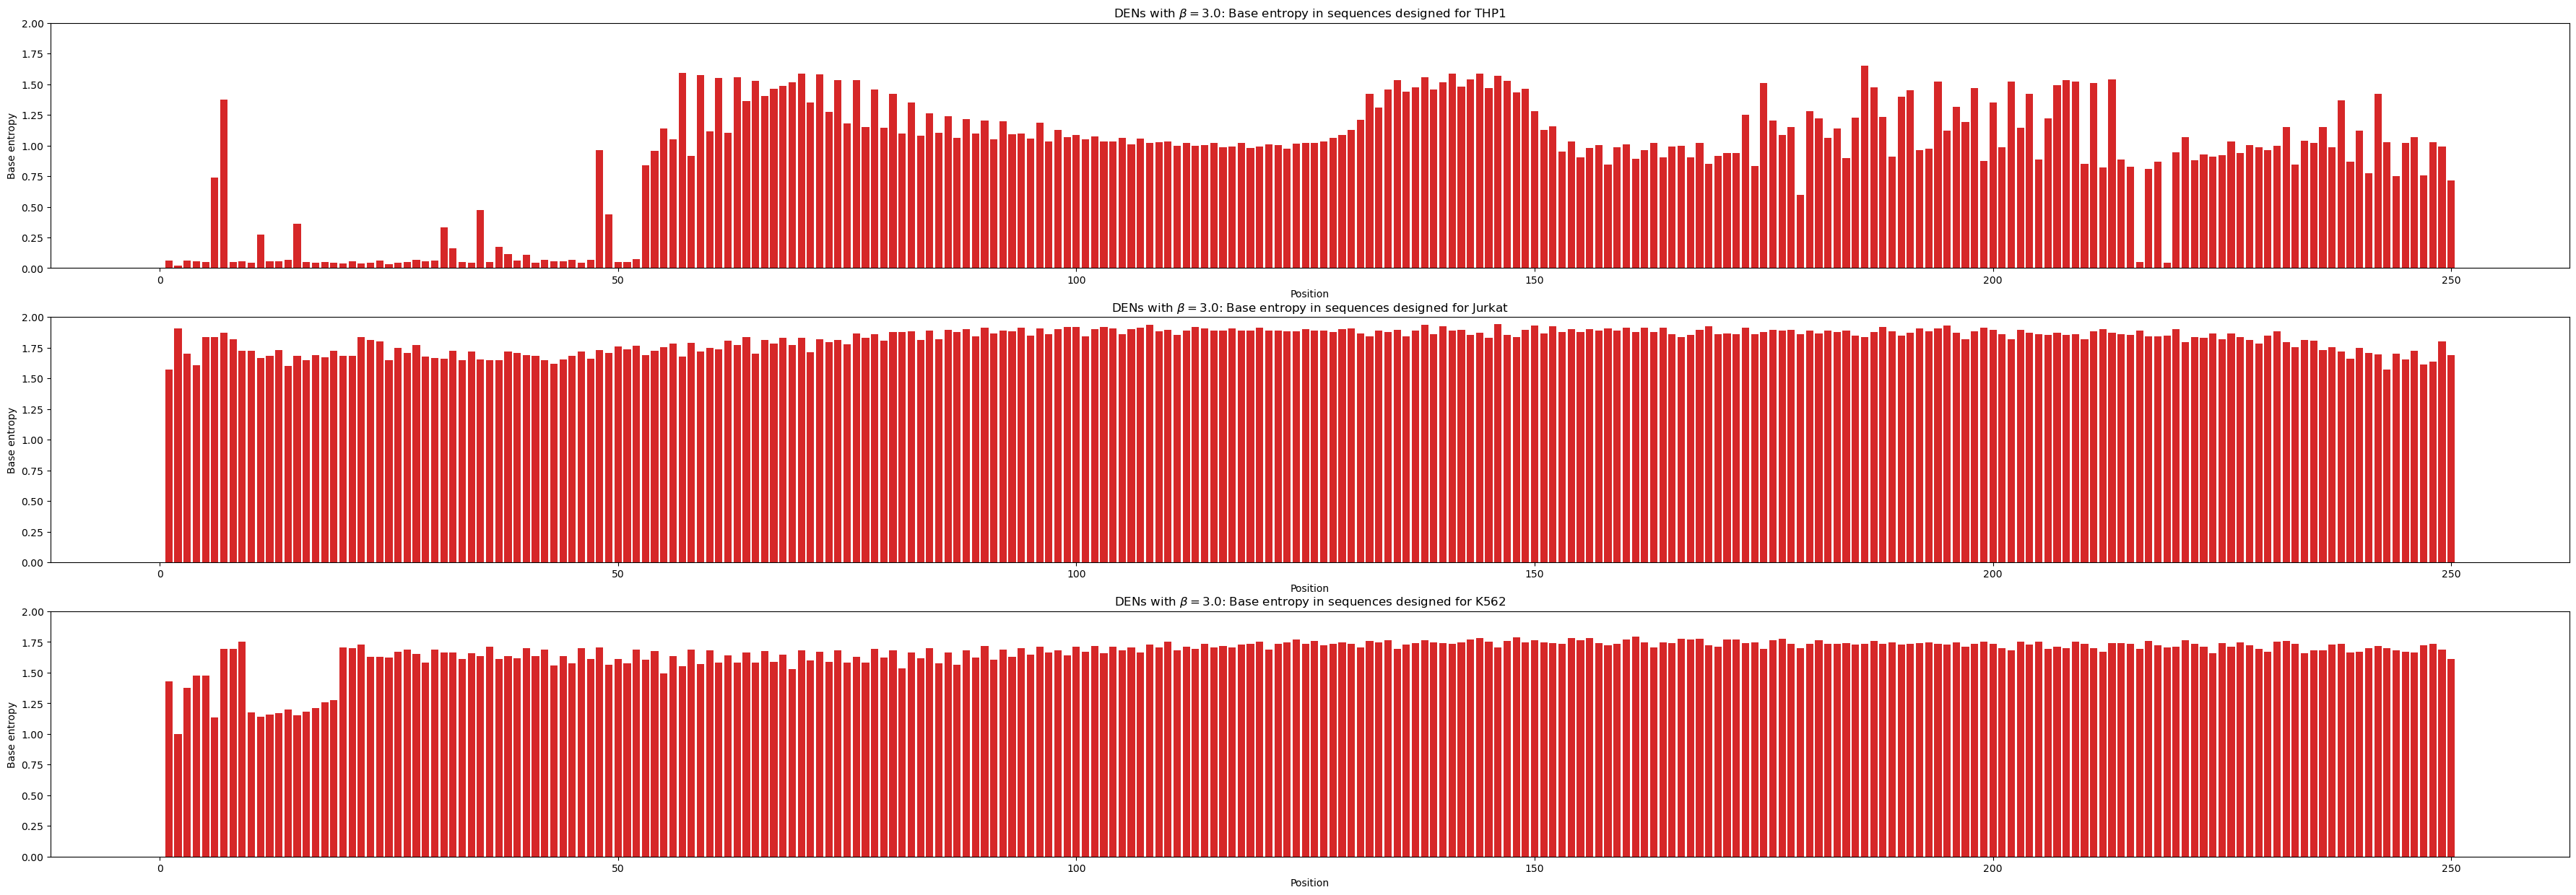

dens_final_design_v2_diversity_10.0
thp1
jurkat
k562


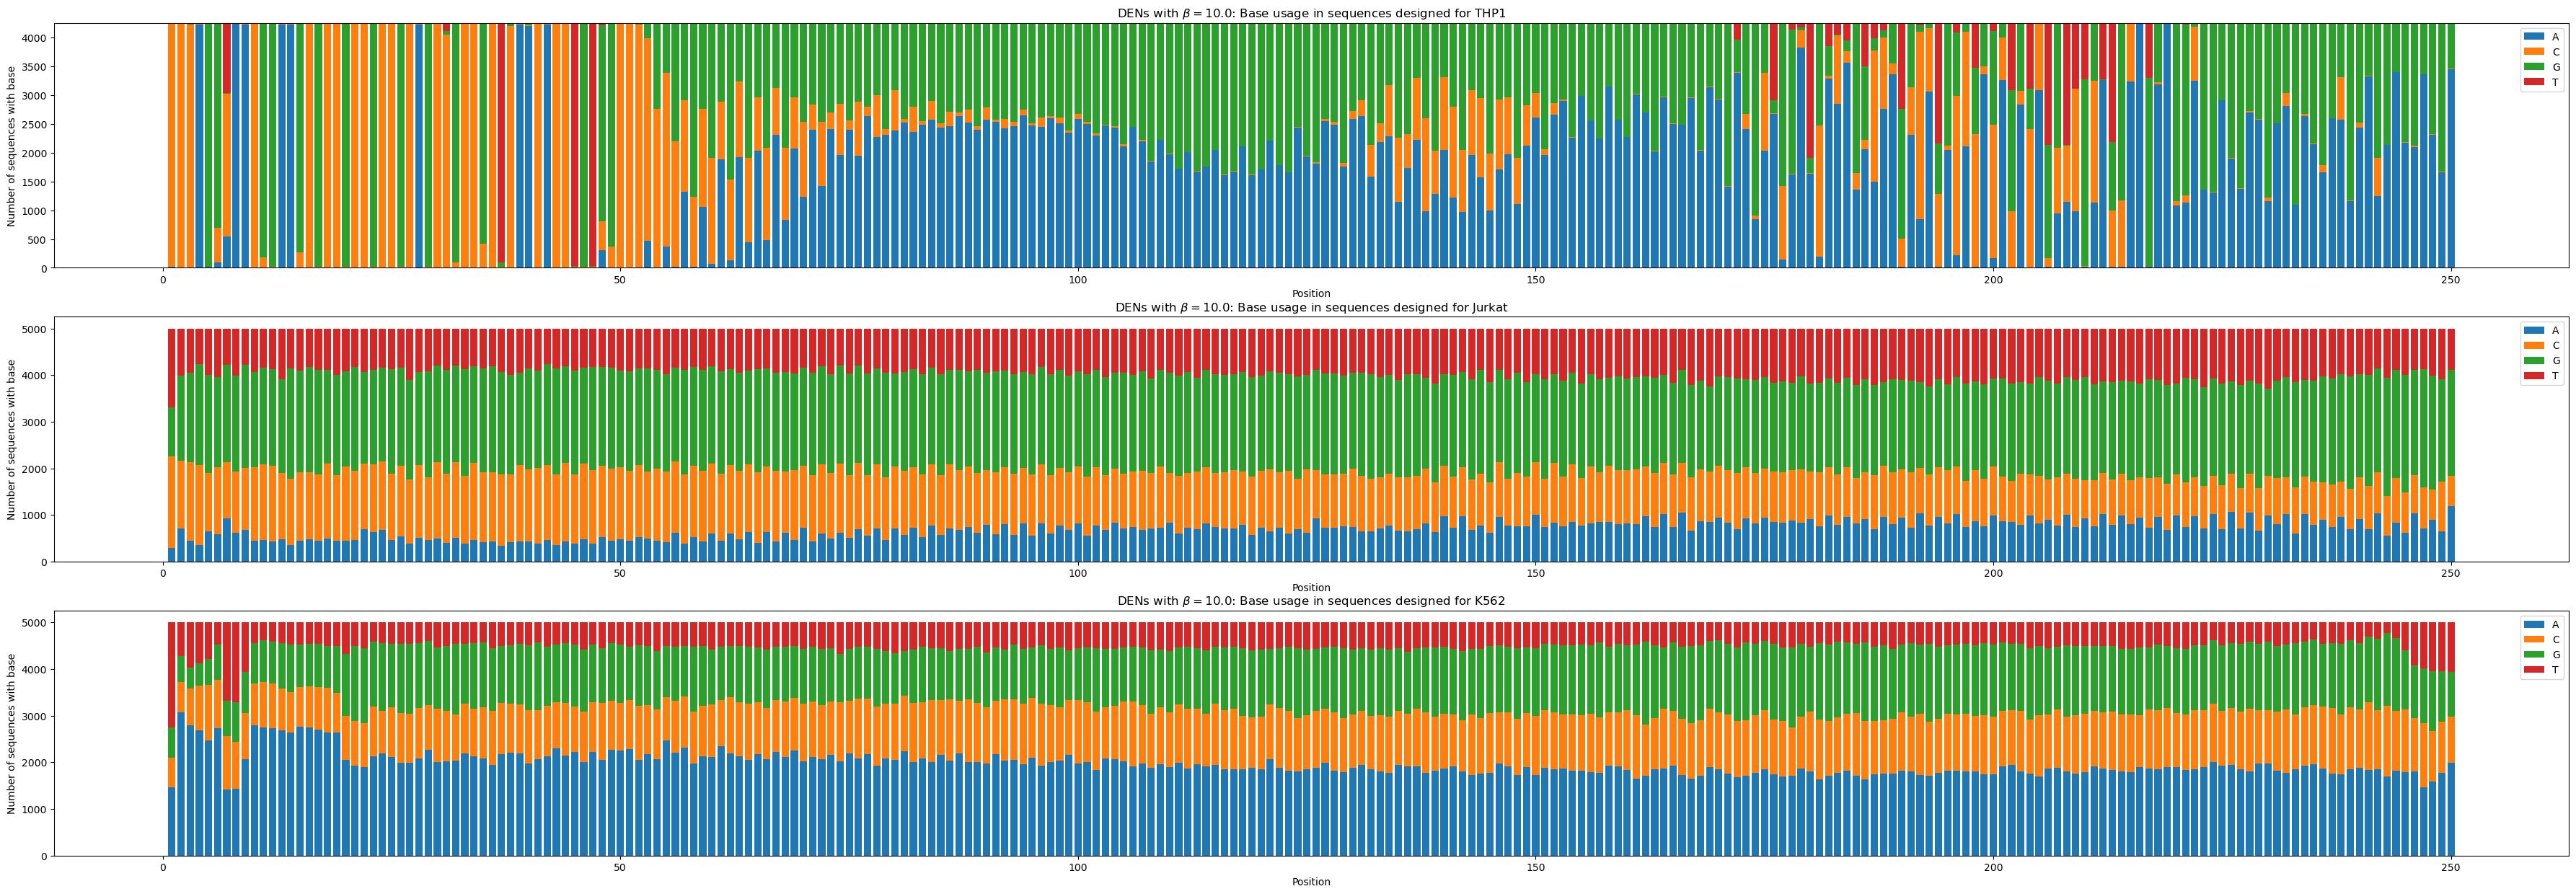

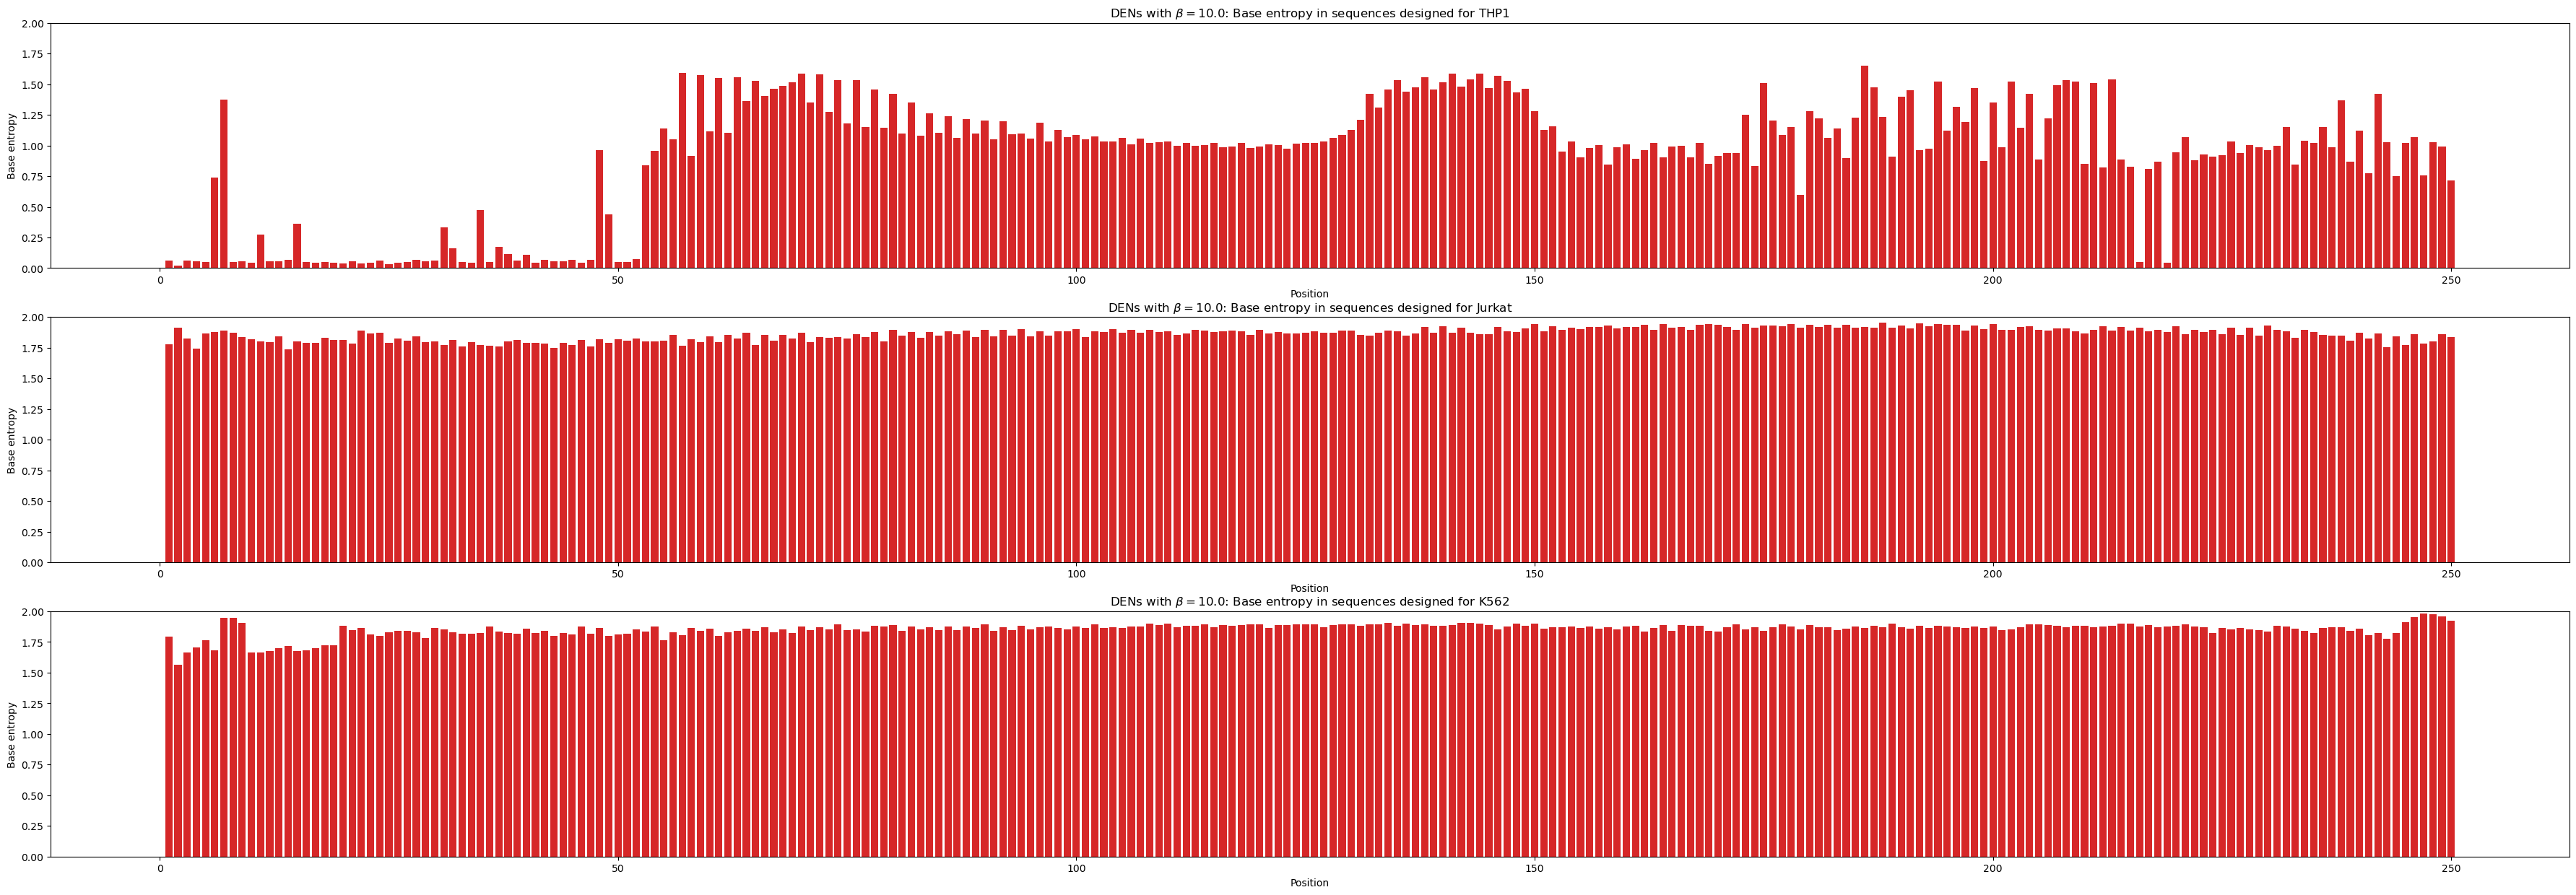

gradient_ascent_final_design_v2
thp1
jurkat
k562


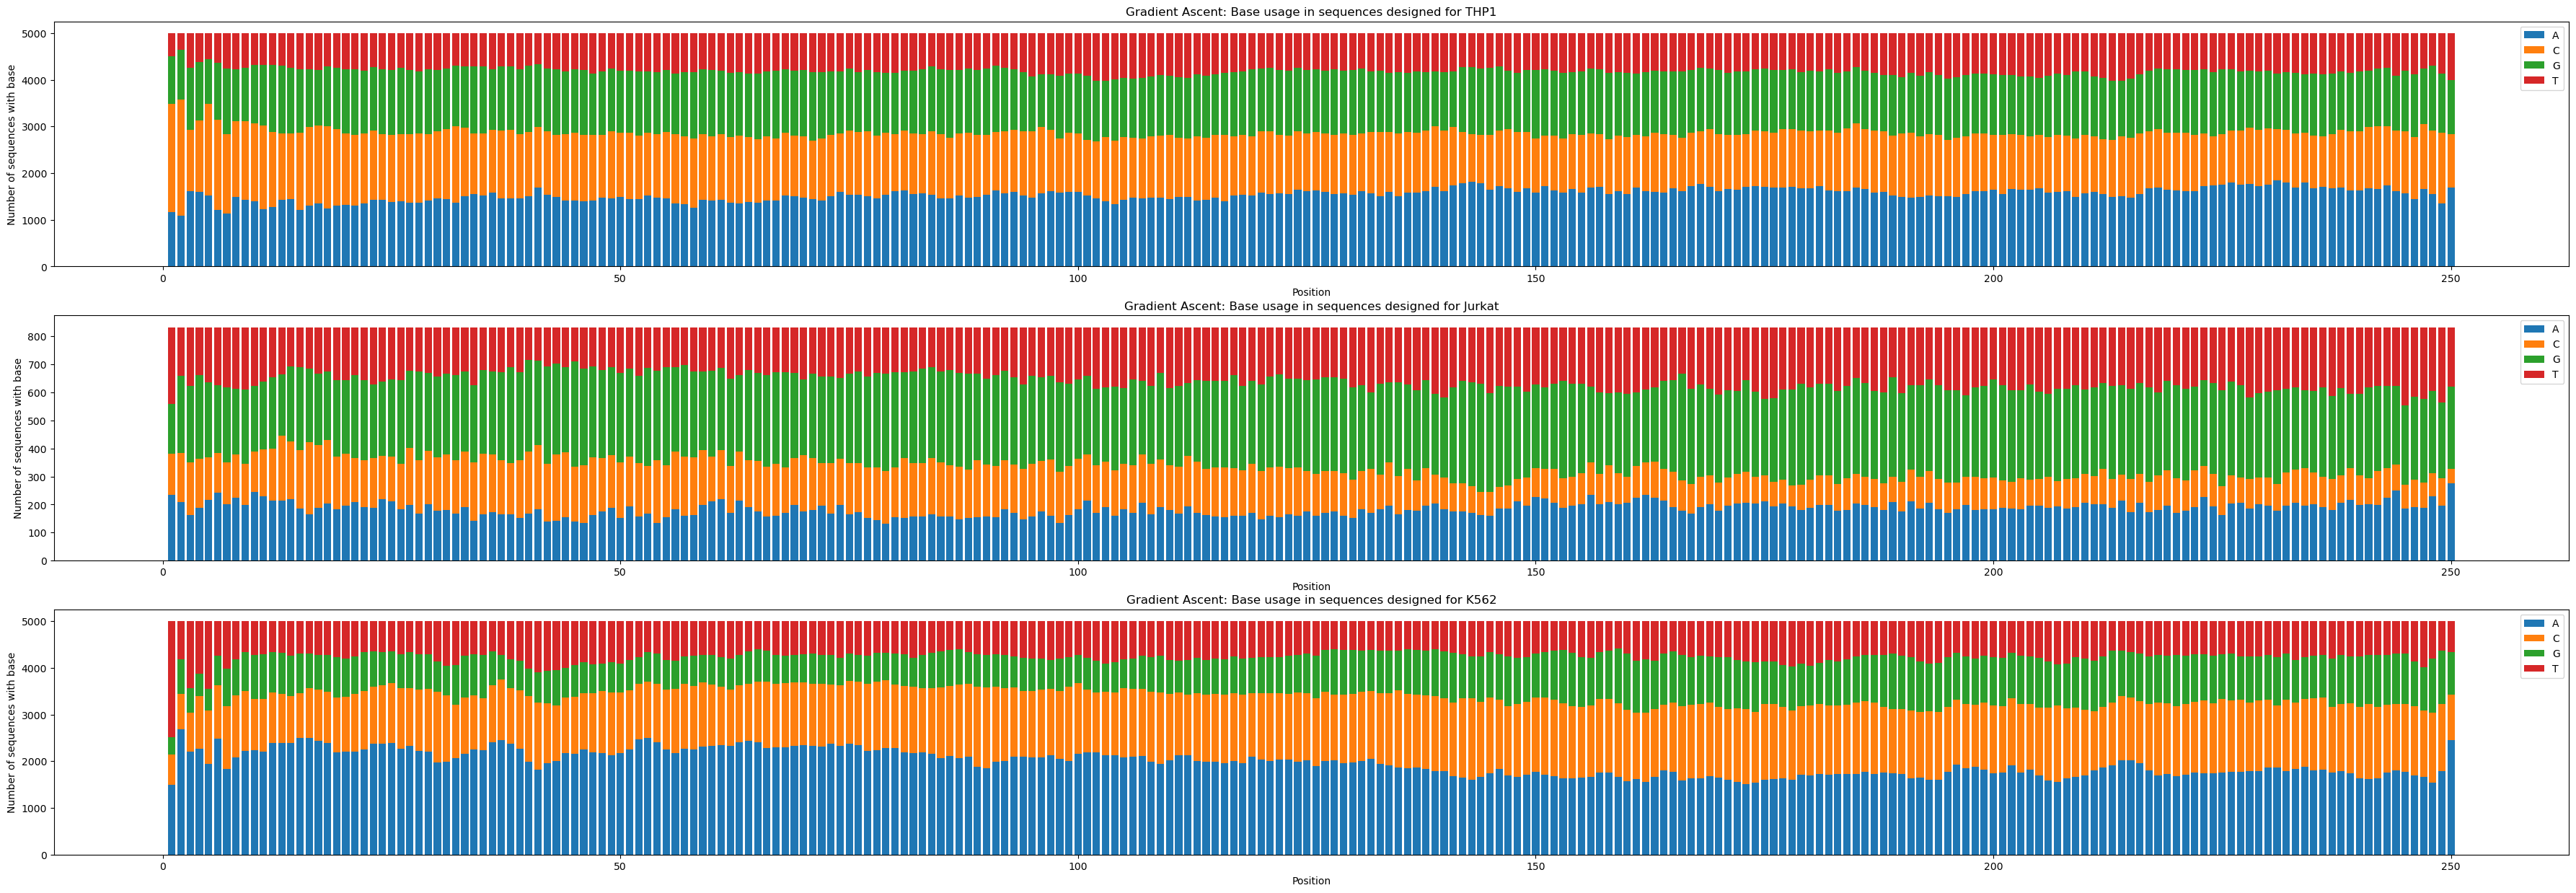

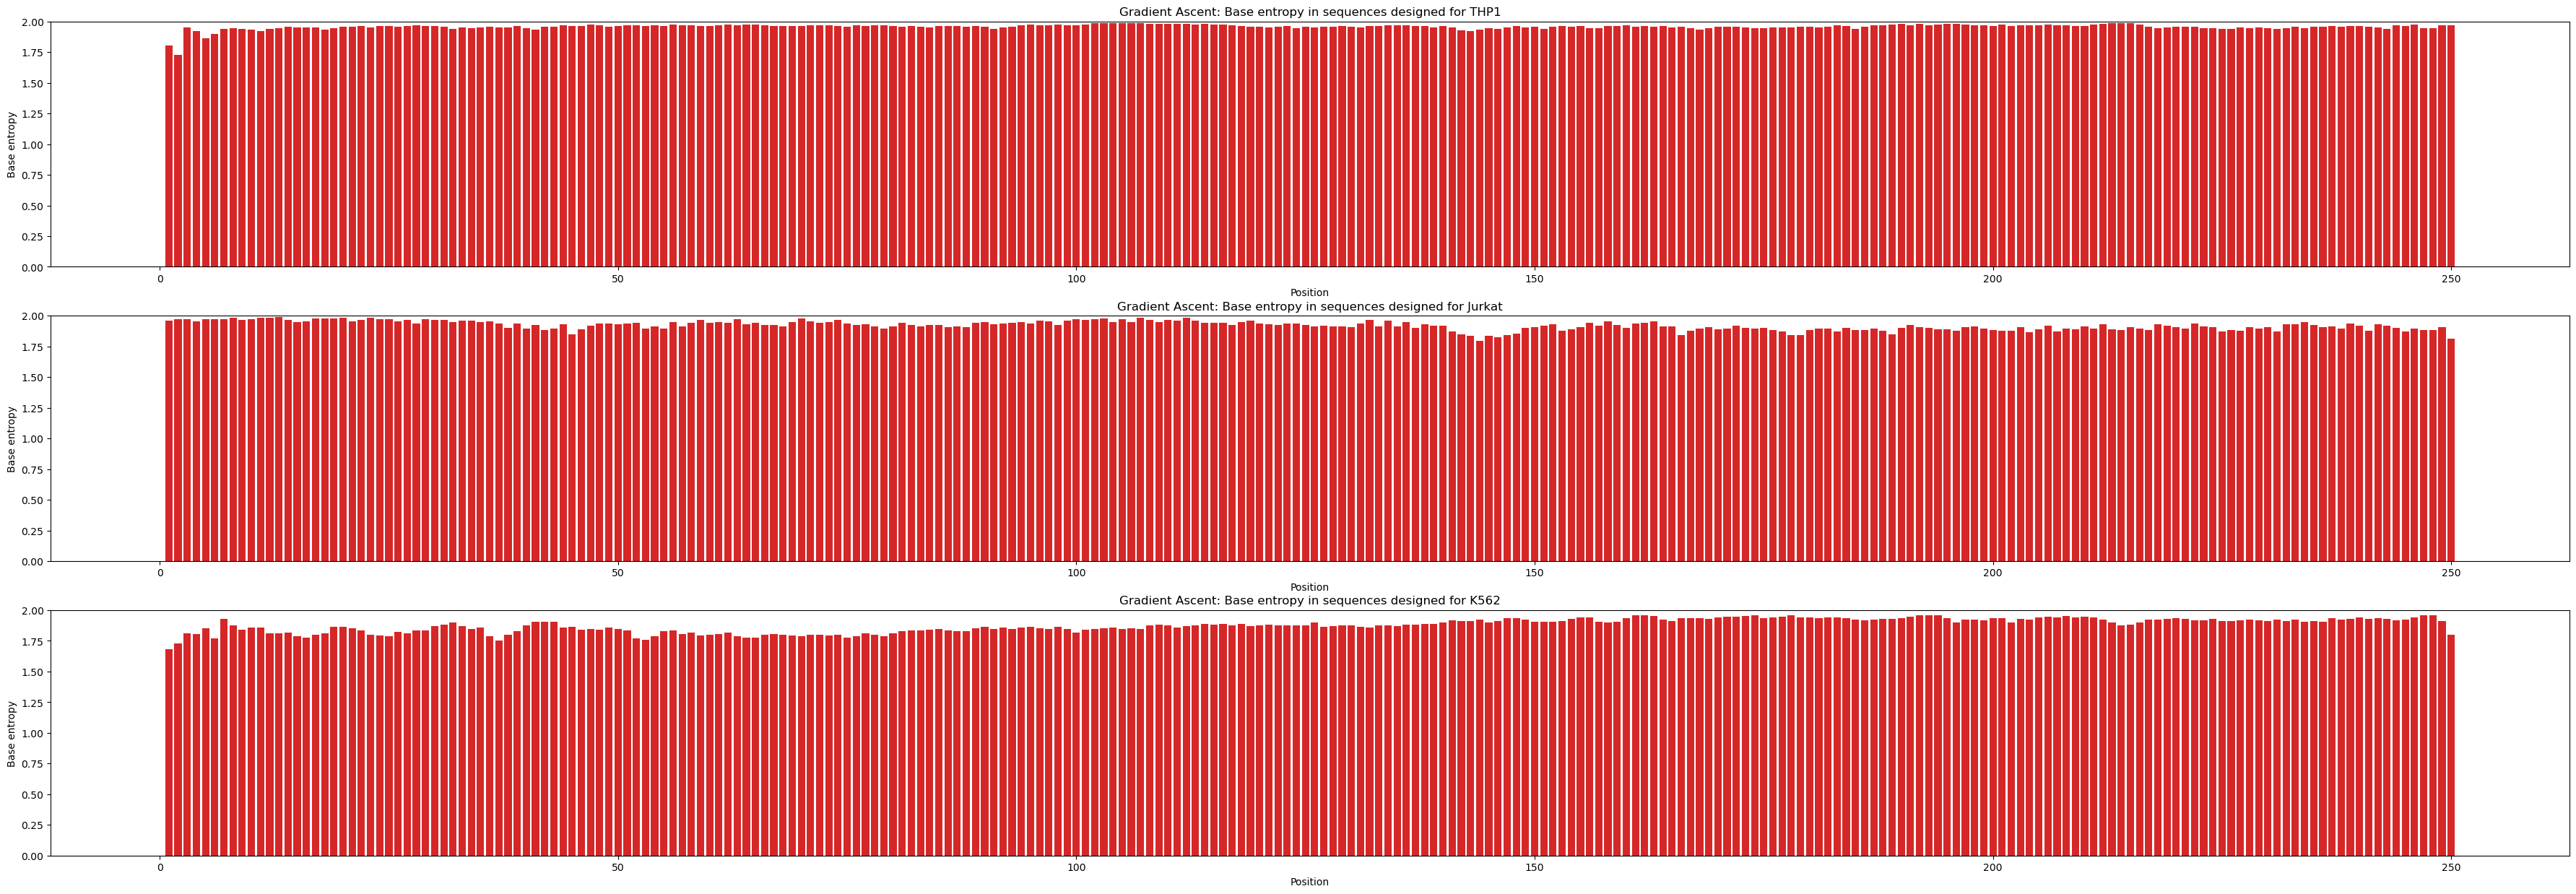

In [6]:
methods = ["best_in_dataset",
           "motif_tiling", 
           "coms_final_design_v2", 
           "dens_final_design_v2_diversity_0.0", 
           "dens_final_design_v2_diversity_0.1",
           "dens_final_design_v2_diversity_0.3",
           "dens_final_design_v2_diversity_1.0",
           "dens_final_design_v2_diversity_3.0",
           "dens_final_design_v2_diversity_10.0", 
           "gradient_ascent_final_design_v2"]

method_to_name = {"best_in_dataset": "Best in dataset",
                  "motif_tiling": "Motif Tiling", 
                  "coms_final_design_v2": "COMs", 
                  "dens_final_design_v2_diversity_0.0": r"DENs with $\beta = 0.0$", 
                  "dens_final_design_v2_diversity_0.1": r"DENs with $\beta = 0.1$",
                  "dens_final_design_v2_diversity_0.3": r"DENs with $\beta = 0.3$",
                  "dens_final_design_v2_diversity_1.0": r"DENs with $\beta = 1.0$",
                  "dens_final_design_v2_diversity_3.0": r"DENs with $\beta = 3.0$",
                  "dens_final_design_v2_diversity_10.0": r"DENs with $\beta = 10.0$", 
                  "gradient_ascent_final_design_v2": "Gradient Ascent"}

name_map = {"thp1": "THP1", "jurkat": "Jurkat", "k562": "K562"}

entropy_df = {}
entropy_df["Method"] = []
for n in name_map:
    entropy_df[name_map[n]] = []

for i, method in enumerate(methods):
    print(method)
    if method == "best_in_dataset":
        seqs_ensemble_0 = pickle.load(open(os.path.join(ensemble_predictions_dir, "dataset_seqs_eval_3.pkl"), "rb"))
        seqs_ensemble_1 = pickle.load(open(os.path.join(ensemble_predictions_dir, "dataset_seqs_eval_4.pkl"), "rb"))
        
        df = {}
        df["sequences"] = []
        df["designed_for"] = []    
        
        for cell in ["jurkat", "k562", "thp1"]:
            df[f"{cell}_mean_0"] = []
            df[f"{cell}_mean_1"] = []
        
        for target in ["jurkat", "k562", "thp1"]:            
            data_diff = get_data_diff_exp(seqs_ensemble_0, target)
            filter = (data_diff > np.sort(data_diff)[-5001])
            print(filter.sum())
            diff = get_diff_exp(seqs_ensemble_0, target).mean(axis=0)[filter]
            
            df["sequences"].extend([id2seq(i) for i in seqs_ensemble_0["sequences"][filter]])
            df["designed_for"].extend([target for i in range(5000)])
            for cell in ["jurkat", "k562", "thp1"]:
                df[f"{cell}_mean_0"].extend(seqs_ensemble_0[f'ensemble_sequences_{cell}_pred'].mean(axis=0)[filter])
                df[f"{cell}_mean_1"].extend(seqs_ensemble_1[f'ensemble_sequences_{cell}_pred'].mean(axis=0)[filter])
        
        df = pd.DataFrame(df)
        seqs_df = df.copy()
        
    elif method == "motif_tiling":
        seqs_ensemble_0 = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_generated_using_DE_motifs_eval_3.pkl"), "rb"))
        seqs_ensemble_1 = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_generated_using_DE_motifs_eval_4.pkl"), "rb"))
        
        df = pd.DataFrame()
        df["sequences"] = [id2seq(i) for i in seqs_ensemble_0["sequence"]]
        df["designed_for"] = [x.lower() for x in seqs_ensemble_0["designed_for"]]
        
        for cell in ["jurkat", "k562", "thp1"]:
            df[f"{cell}_mean_0"] = seqs_ensemble_0[f'ensemble_sequence_{cell}_pred'].mean(axis=0)
            df[f"{cell}_mean_1"] = seqs_ensemble_1[f'ensemble_sequence_{cell}_pred'].mean(axis=0)
        
        seqs_df = df.copy()
        
    else:
        seqs = pickle.load(open(os.path.join(final_design_seqs_dir, f"{method}.pkl"), "rb"))
        seqs_df = []
        kmer_features = {}
        for cell in ["jurkat", "k562", "thp1"]:
            kmer_features[cell] = seqs[cell]["kmer_features"]
            seqs[cell].pop("kmer_features")
            df = pd.DataFrame(seqs[cell])
            df["designed_for"] = cell

            seqs_df.append(df)

        seqs_df = pd.concat(seqs_df).reset_index(drop=True)
    
    fix, ax = plt.subplots(3, 1, figsize=(45, 15))
    fix2, ax2 = plt.subplots(3, 1, figsize=(45, 15))
    
    entropy_df["Method"].append(method_to_name[method])
    for j, cell in enumerate(["thp1", "jurkat", "k562"]):
        print(cell)
        x = get_base_usage(list(seqs_df[seqs_df["designed_for"] == cell]["sequences"]))
        plot_base_usage(x, "{}: Base usage in sequences designed for {}".format(method_to_name[method], name_map[cell]), ax[j])
        ent = plot_base_entropy(x, "{}: Base entropy in sequences designed for {}".format(method_to_name[method], name_map[cell]), ax2[j])
        
        entropy_df[name_map[cell]].append(ent)
        
    # show the plot
    plt.show()

In [7]:
pd.DataFrame(entropy_df)

,Method,THP1,Jurkat,K562
0,Best in dataset,1.97,1.94,1.94
1,Motif Tiling,1.92,1.89,1.92
2,COMs,1.96,1.87,1.96
3,DENs with $\beta = 0.0$,0.93,1.78,1.54
4,DENs with $\beta = 0.1$,0.93,1.78,1.54
5,DENs with $\beta = 0.3$,0.93,1.79,1.55
6,DENs with $\beta = 1.0$,0.93,1.79,1.58
7,DENs with $\beta = 3.0$,0.93,1.82,1.67
8,DENs with $\beta = 10.0$,0.93,1.87,1.86
9,Gradient Ascent,1.96,1.92,1.88


17104


1.96

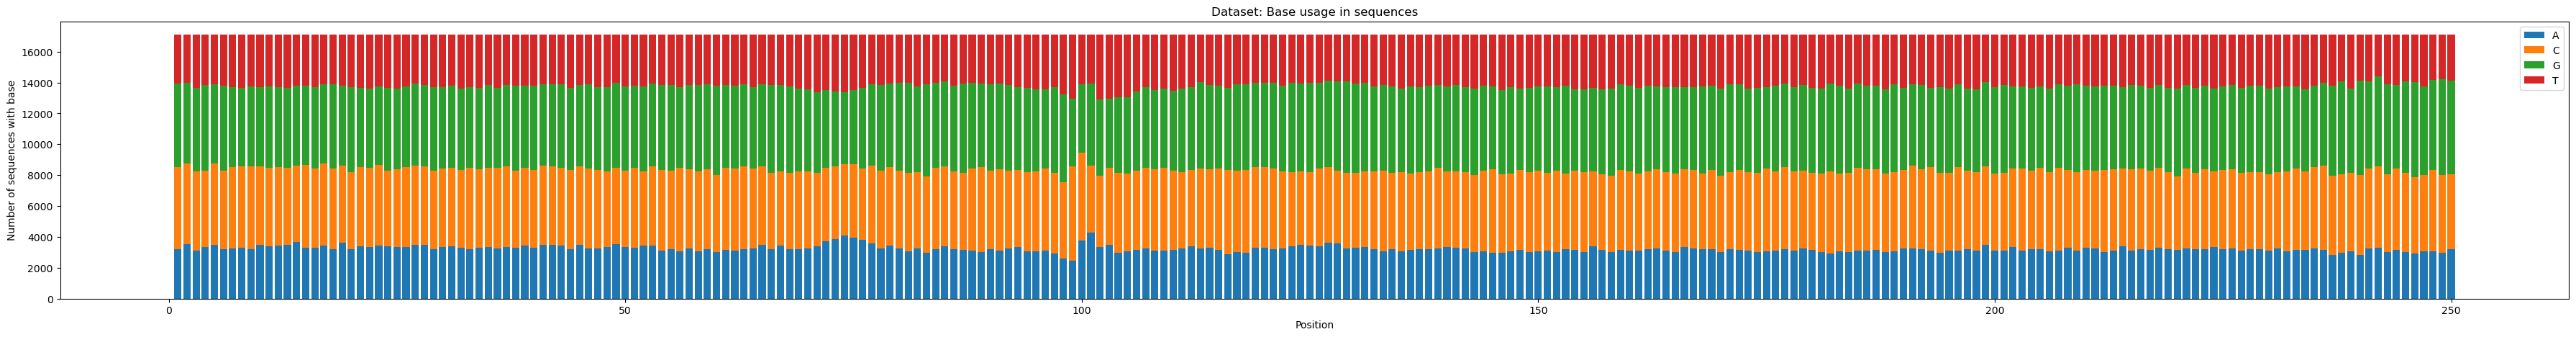

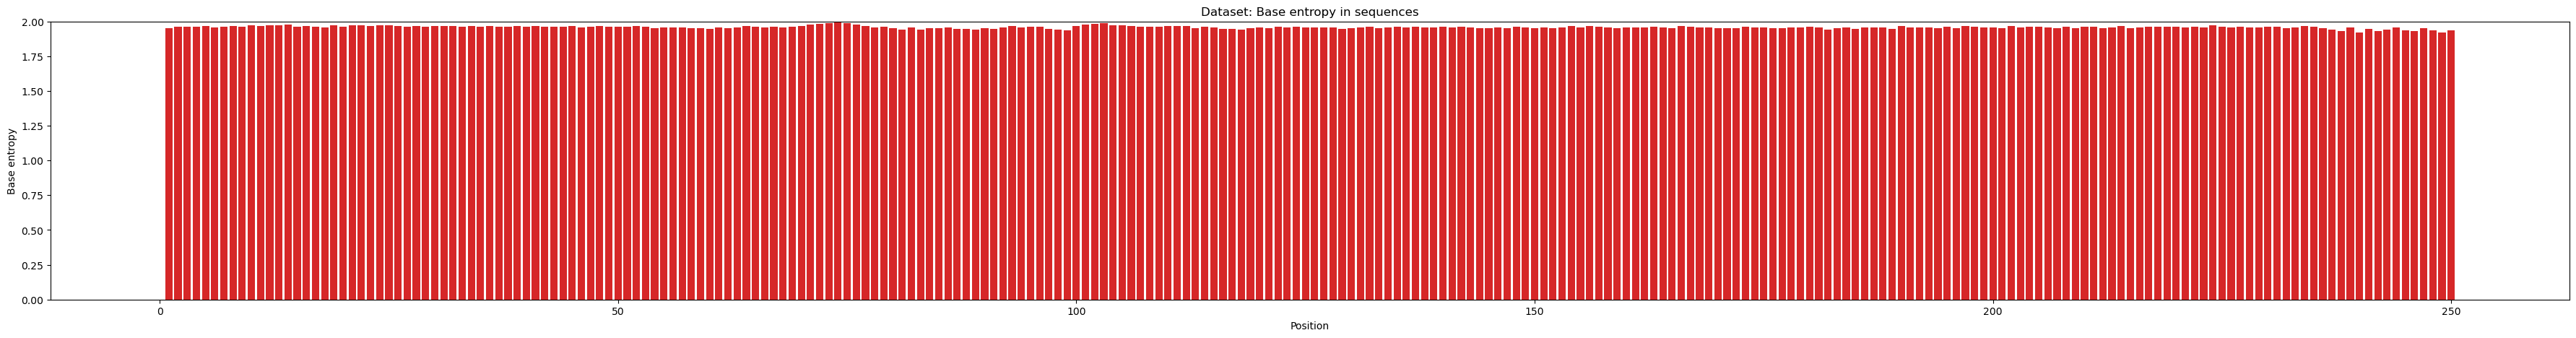

In [8]:
# NOTE: ensemble 0 is the original ensemble 3 and ensemble 1 is the original ensemble 4
ensemble_predictions_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/ensemble_predictions/"
ensemble_1_filtered_sequences = pd.read_parquet(os.path.join(ensemble_predictions_dir, 
                                                             "filtered_ensemble_4_predictions.parquet"))
ensemble_1_dataset_seqs = ensemble_1_filtered_sequences[ensemble_1_filtered_sequences["design_method"] == "Dataset"].reset_index(drop=True)

x = get_base_usage(list(ensemble_1_dataset_seqs["sequence"]))
print(len(list(ensemble_1_dataset_seqs["sequence"])))

fig, ax = plt.subplots(figsize=(45, 5))
fig2, ax2 = plt.subplots(figsize=(45, 5))
plot_base_usage(x, "Dataset: Base usage in sequences", ax)
plot_base_entropy(x, "Dataset: Base entropy in sequences", ax2)